### Análisis de datos del COVID-19 para los países de Argentina, Brasil, Chile, Colombia, Mexico y Peru desde enero del 2021 hasta octubre del 2022 

In [ ]:
# Se importan las librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
# Ruta al archivo CSV
data = '.../PI/data_latinoamerica.csv'

# Leer el archivo CSV
df_data = pd.read_csv(data)

In [3]:
# Mostrar las primeras filas del DataFrame para verificar su contenido
df_data.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [4]:
# Obtener información del DataFrame
info_general = df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   location_key                           object 
 1   date                                   object 
 2   country_code                           object 
 3   country_name                           object 
 4   new_confirmed                          float64
 5   new_deceased                           float64
 6   cumulative_confirmed                   float64
 7   cumulative_deceased                    float64
 8   cumulative_vaccine_doses_administered  float64
 9   population                             float64
 10  population_male                        float64
 11  population_female                      float64
 12  population_rural                       float64
 13  population_urban                       float64
 14  population_density                     float64
 

In [5]:
# Se confirma la cantidad original de filas y columnas
print(df_data.shape)

(12216057, 50)


In [ ]:
# Se confirman los nombres de los países 
print(df_data['country_name'].unique())

['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Costa Rica' 'Cuba'
 'Dominican Republic' 'Ecuador' 'Guatemala' 'Honduras' 'Mexico'
 'Nicaragua' 'Panama' 'Peru' 'Puerto Rico' 'Paraguay' 'El Salvador'
 'Uruguay' 'Venezuela']


In [9]:
# FILTRADO DE DATOS

# Se seleccionan los paises indicados 
paises_seleccionados = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']
df_latinoamerica = df_data[df_data['country_name'].isin(paises_seleccionados)]

In [10]:
df_latinoamerica

location_key       date country_code country_name  new_confirmed  \
0                  AR 2020-01-01           AR    Argentina            3.0   
1                  AR 2020-01-02           AR    Argentina           14.0   
2                  AR 2020-01-03           AR    Argentina            3.0   
3                  AR 2020-01-04           AR    Argentina            7.0   
4                  AR 2020-01-05           AR    Argentina            5.0   
...               ...        ...          ...          ...            ...   
12136772  PE_UCA_0401 2022-09-13           PE         Peru            NaN   
12136773  PE_UCA_0401 2022-09-14           PE         Peru            NaN   
12136774  PE_UCA_0401 2022-09-15           PE         Peru            NaN   
12136775  PE_UCA_0401 2022-09-16           PE         Peru            NaN   
12136776  PE_UCA_0401 2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0                  0.0                   3.0                  0.0   
1                  0.0                  17.0                  0.0   
2                  0.0                  20.0                  0.0   
3                  0.0                  27.0                  0.0   
4                  0.0                  32.0                  0.0   
...                ...                   ...                  ...   
12136772           NaN                   NaN                  NaN   
12136773           NaN                   NaN                  NaN   
12136774           NaN                   NaN                  NaN   
12136775           NaN                   NaN                  NaN   
12136776           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
0                                           NaN  44938712.0  ...   
1                                           NaN  44938712.0  ...   
2                                           NaN  44938712.0  ...   
3                                           NaN  44938712.0  ...   
4                                           NaN  44938712.0  ...   
...                                         ...         ...  ...   
12136772                                    NaN      2860.0  ...   
12136773                                    NaN      2860.0  ...   
12136774                                    NaN      2860.0  ...   
12136775                                    NaN      2860.0  ...   
12136776                                    NaN      2860.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                      15057273.0         2690269.0           55032.0   
1                      15057273.0         2690269.0           55032.0   
2                      15057273.0         2690269.0           55032.0   
3                      15057273.0         2690269.0           55032.0   
4                      15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
12136772                      NaN               NaN               NaN   
12136773                      NaN               NaN               NaN   
12136774                      NaN               NaN               NaN   
12136775                      NaN               NaN               NaN   
12136776                      NaN               NaN               NaN   

          life_expectancy  adult_male_mortality_rate  \
0                   76.52                    147.086   
1                   76.52                    147.086   
2                   76.52                    147.086   
3                   76.52                    147.086   
4                   76.52                    147.086   
...                   ...                        ...   
12136772              NaN                        NaN   
12136773              NaN                        NaN   
12136774              NaN                        NaN   
1

In [11]:
# Se filtra para obtener solo las filas donde la fecha sea mayor a 2021-01-01
df_mayor_2021 = df_latinoamerica[df_latinoamerica['date'] >= '2021-01-01']

# Resultado
df_mayor_2021

location_key       date country_code country_name  new_confirmed  \
366                AR 2021-01-01           AR    Argentina         2685.0   
367                AR 2021-01-02           AR    Argentina         7767.0   
368                AR 2021-01-03           AR    Argentina         4934.0   
369                AR 2021-01-04           AR    Argentina        13953.0   
370                AR 2021-01-05           AR    Argentina        14085.0   
...               ...        ...          ...          ...            ...   
12136772  PE_UCA_0401 2022-09-13           PE         Peru            NaN   
12136773  PE_UCA_0401 2022-09-14           PE         Peru            NaN   
12136774  PE_UCA_0401 2022-09-15           PE         Peru            NaN   
12136775  PE_UCA_0401 2022-09-16           PE         Peru            NaN   
12136776  PE_UCA_0401 2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
366              140.0             1662867.0              46522.0   
367              166.0             1670634.0              46688.0   
368              157.0             1675568.0              46845.0   
369              157.0             1689521.0              47002.0   
370              160.0             1703606.0              47162.0   
...                ...                   ...                  ...   
12136772           NaN                   NaN                  NaN   
12136773           NaN                   NaN                  NaN   
12136774           NaN                   NaN                  NaN   
12136775           NaN                   NaN                  NaN   
12136776           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
366                                     18849.0  44938712.0  ...   
367                                     20334.0  44938712.0  ...   
368                                     20529.0  44938712.0  ...   
369                                     25164.0  44938712.0  ...   
370                                     29852.0  44938712.0  ...   
...                                         ...         ...  ...   
12136772                                    NaN      2860.0  ...   
12136773                                    NaN      2860.0  ...   
12136774                                    NaN      2860.0  ...   
12136775                                    NaN      2860.0  ...   
12136776                                    NaN      2860.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
366                    15057273.0         2690269.0           55032.0   
367                    15057273.0         2690269.0           55032.0   
368                    15057273.0         2690269.0           55032.0   
369                    15057273.0         2690269.0           55032.0   
370                    15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
12136772                      NaN               NaN               NaN   
12136773                      NaN               NaN               NaN   
12136774                      NaN               NaN               NaN   
12136775                      NaN               NaN               NaN   
12136776                      NaN               NaN               NaN   

          life_expectancy  adult_male_mortality_rate  \
366                 76.52                    147.086   
367                 76.52                    147.086   
368                 76.52                    147.086   
369                 76.52                    147.086   
370                 76.52                    147.086   
...                   ...                        ...   
12136772              NaN                        NaN   
12136773              NaN                        NaN   
12136774              NaN                        NaN   
1

In [12]:
# MANEJO DE NULOS Y FALTANTES NaN

# Cantidad de nulos por columna
nulos_total = df_mayor_2021.isnull().sum()
nulos_total

location_key                                   0
date                                           0
country_code                                   0
country_name                                   0
new_confirmed                            3164800
new_deceased                             3167470
cumulative_confirmed                     3164800
cumulative_deceased                      3167470
cumulative_vaccine_doses_administered    7286122
population                                328750
population_male                           708125
population_female                         708125
population_rural                         7545625
population_urban                         7545625
population_density                       7545625
human_development_index                  4081875
population_age_00_09                      924375
population_age_10_19                      924375
population_age_20_29                      924375
population_age_30_39                      924375
population_age_40_49

In [14]:
# Columnas con mas de 6.0000.000 de nulos
nulos_mayor_6millones = df_mayor_2021.isnull().sum()[df_mayor_2021.isnull().sum()>6000000]
nulos_mayor_6millones

cumulative_vaccine_doses_administered    7286122
population_rural                         7545625
population_urban                         7545625
population_density                       7545625
gdp_usd                                  7545000
gdp_per_capita_usd                       7544375
smoking_prevalence                       7545625
diabetes_prevalence                      7545625
infant_mortality_rate                    7545625
nurses_per_1000                          7545625
physicians_per_1000                      7545625
population_largest_city                  7545625
area_rural_sq_km                         7545625
area_urban_sq_km                         7545625
life_expectancy                          7545625
adult_male_mortality_rate                7545625
adult_female_mortality_rate              7545625
pollution_mortality_rate                 7545625
comorbidity_mortality_rate               7545625
new_recovered                            6480988
cumulative_recovered

In [15]:
# En vista de tantos valores faltantes, se realiza nuevamente un filtrado esta vez por la columna 'location_key', dejando solo los países y no las regiones o subregiones
data_final_latinoamerica=df_mayor_2021[df_mayor_2021['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]

# Resultado
data_final_latinoamerica

location_key       date country_code country_name  new_confirmed  \
366                AR 2021-01-01           AR    Argentina         2685.0   
367                AR 2021-01-02           AR    Argentina         7767.0   
368                AR 2021-01-03           AR    Argentina         4934.0   
369                AR 2021-01-04           AR    Argentina        13953.0   
370                AR 2021-01-05           AR    Argentina        14085.0   
...               ...        ...          ...          ...            ...   
10253872           PE 2022-09-13           PE         Peru         1150.0   
10253873           PE 2022-09-14           PE         Peru            NaN   
10253874           PE 2022-09-15           PE         Peru            NaN   
10253875           PE 2022-09-16           PE         Peru            NaN   
10253876           PE 2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
366              140.0             1662867.0              46522.0   
367              166.0             1670634.0              46688.0   
368              157.0             1675568.0              46845.0   
369              157.0             1689521.0              47002.0   
370              160.0             1703606.0              47162.0   
...                ...                   ...                  ...   
10253872          22.0             4127612.0             216173.0   
10253873           NaN                   NaN                  NaN   
10253874           NaN                   NaN                  NaN   
10253875           NaN                   NaN                  NaN   
10253876           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
366                                     18849.0  44938712.0  ...   
367                                     20334.0  44938712.0  ...   
368                                     20529.0  44938712.0  ...   
369                                     25164.0  44938712.0  ...   
370                                     29852.0  44938712.0  ...   
...                                         ...         ...  ...   
10253872                                    NaN  29381884.0  ...   
10253873                                    NaN  29381884.0  ...   
10253874                                    NaN  29381884.0  ...   
10253875                                    NaN  29381884.0  ...   
10253876                                    NaN  29381884.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
366                    15057273.0         2690269.0           55032.0   
367                    15057273.0         2690269.0           55032.0   
368                    15057273.0         2690269.0           55032.0   
369                    15057273.0         2690269.0           55032.0   
370                    15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
10253872               10554712.0         1256339.0           16425.0   
10253873               10554712.0         1256339.0           16425.0   
10253874               10554712.0         1256339.0           16425.0   
10253875               10554712.0         1256339.0           16425.0   
10253876               10554712.0         1256339.0           16425.0   

          life_expectancy  adult_male_mortality_rate  \
366                76.520                    147.086   
367                76.520                    147.086   
368                76.520                    147.086   
369                76.520                    147.086   
370                76.520                    147.086   
...                   ...                        ...   
10253872           76.516                    146.370   
10253873           76.516                    146.370   
10253874           76.516                    146.370   
1

In [16]:
# Se consulta nuevamente las columnas con nulos
columnas_con_nulos = data_final_latinoamerica.isnull().sum()[data_final_latinoamerica.isnull().sum()>0]
columnas_con_nulos

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     589
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2119
cumulative_recovered                     2740
dtype: int64

In [17]:
# Se rellenan con 0 los valores faltantes de las columnas new_recovered, cumulative_recovered y cumulative_vaccine_doses_administered

data_final_latinoamerica.fillna({'new_recovered': 0}, inplace=True)
data_final_latinoamerica.fillna({'cumulative_recovered': 0}, inplace=True)
data_final_latinoamerica.fillna({'cumulative_vaccine_doses_administered': 0}, inplace=True)
data_final_latinoamerica

C:\Users\admin\AppData\Local\Temp\ipykernel_1668\1463123795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_latinoamerica.fillna({'new_recovered': 0}, inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_1668\1463123795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_latinoamerica.fillna({'cumulative_recovered': 0}, inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_1668\1463123795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

location_key       date country_code country_name  new_confirmed  \
366                AR 2021-01-01           AR    Argentina         2685.0   
367                AR 2021-01-02           AR    Argentina         7767.0   
368                AR 2021-01-03           AR    Argentina         4934.0   
369                AR 2021-01-04           AR    Argentina        13953.0   
370                AR 2021-01-05           AR    Argentina        14085.0   
...               ...        ...          ...          ...            ...   
10253872           PE 2022-09-13           PE         Peru         1150.0   
10253873           PE 2022-09-14           PE         Peru            NaN   
10253874           PE 2022-09-15           PE         Peru            NaN   
10253875           PE 2022-09-16           PE         Peru            NaN   
10253876           PE 2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
366              140.0             1662867.0              46522.0   
367              166.0             1670634.0              46688.0   
368              157.0             1675568.0              46845.0   
369              157.0             1689521.0              47002.0   
370              160.0             1703606.0              47162.0   
...                ...                   ...                  ...   
10253872          22.0             4127612.0             216173.0   
10253873           NaN                   NaN                  NaN   
10253874           NaN                   NaN                  NaN   
10253875           NaN                   NaN                  NaN   
10253876           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
366                                     18849.0  44938712.0  ...   
367                                     20334.0  44938712.0  ...   
368                                     20529.0  44938712.0  ...   
369                                     25164.0  44938712.0  ...   
370                                     29852.0  44938712.0  ...   
...                                         ...         ...  ...   
10253872                                    0.0  29381884.0  ...   
10253873                                    0.0  29381884.0  ...   
10253874                                    0.0  29381884.0  ...   
10253875                                    0.0  29381884.0  ...   
10253876                                    0.0  29381884.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
366                    15057273.0         2690269.0           55032.0   
367                    15057273.0         2690269.0           55032.0   
368                    15057273.0         2690269.0           55032.0   
369                    15057273.0         2690269.0           55032.0   
370                    15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
10253872               10554712.0         1256339.0           16425.0   
10253873               10554712.0         1256339.0           16425.0   
10253874               10554712.0         1256339.0           16425.0   
10253875               10554712.0         1256339.0           16425.0   
10253876               10554712.0         1256339.0           16425.0   

          life_expectancy  adult_male_mortality_rate  \
366                76.520                    147.086   
367                76.520                    147.086   
368                76.520                    147.086   
369                76.520                    147.086   
370                76.520                    147.086   
...                   ...                        ...   
10253872           76.516                    146.370   
10253873           76.516                    146.370   
10253874           76.516                    146.370   
1

In [18]:
# RELLENAR VALORES FALTANTES

# Se identifican las columnas con valores faltantes
columnas_valores_faltantes = data_final_latinoamerica.columns[data_final_latinoamerica.isnull().any()]
columnas_valores_faltantes

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity'],
      dtype='object')

In [19]:
# Se realiza un ciclo para rellenar los valores faltantes con su respectivo valor promedio
for columna in columnas_valores_faltantes:
    data_final_latinoamerica.loc[:, columna] = data_final_latinoamerica.groupby('country_name')[columna].transform(lambda x : x.fillna(x.mean()))

# Resultado
data_final_latinoamerica

location_key       date country_code country_name  new_confirmed  \
366                AR 2021-01-01           AR    Argentina    2685.000000   
367                AR 2021-01-02           AR    Argentina    7767.000000   
368                AR 2021-01-03           AR    Argentina    4934.000000   
369                AR 2021-01-04           AR    Argentina   13953.000000   
370                AR 2021-01-05           AR    Argentina   14085.000000   
...               ...        ...          ...          ...            ...   
10253872           PE 2022-09-13           PE         Peru    1150.000000   
10253873           PE 2022-09-14           PE         Peru    5025.251208   
10253874           PE 2022-09-15           PE         Peru    5025.251208   
10253875           PE 2022-09-16           PE         Peru    5025.251208   
10253876           PE 2022-09-17           PE         Peru    5025.251208   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
366         140.000000          1.662867e+06         46522.000000   
367         166.000000          1.670634e+06         46688.000000   
368         157.000000          1.675568e+06         46845.000000   
369         157.000000          1.689521e+06         47002.000000   
370         160.000000          1.703606e+06         47162.000000   
...                ...                   ...                  ...   
10253872     22.000000          4.127612e+06        216173.000000   
10253873    197.165862          2.574404e+06        188801.674718   
10253874    197.165862          2.574404e+06        188801.674718   
10253875    197.165862          2.574404e+06        188801.674718   
10253876    197.165862          2.574404e+06        188801.674718   

          cumulative_vaccine_doses_administered  population  ...  \
366                                     18849.0  44938712.0  ...   
367                                     20334.0  44938712.0  ...   
368                                     20529.0  44938712.0  ...   
369                                     25164.0  44938712.0  ...   
370                                     29852.0  44938712.0  ...   
...                                         ...         ...  ...   
10253872                                    0.0  29381884.0  ...   
10253873                                    0.0  29381884.0  ...   
10253874                                    0.0  29381884.0  ...   
10253875                                    0.0  29381884.0  ...   
10253876                                    0.0  29381884.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
366                    15057273.0         2690269.0           55032.0   
367                    15057273.0         2690269.0           55032.0   
368                    15057273.0         2690269.0           55032.0   
369                    15057273.0         2690269.0           55032.0   
370                    15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
10253872               10554712.0         1256339.0           16425.0   
10253873               10554712.0         1256339.0           16425.0   
10253874               10554712.0         1256339.0           16425.0   
10253875               10554712.0         1256339.0           16425.0   
10253876               10554712.0         1256339.0           16425.0   

          life_expectancy  adult_male_mortality_rate  \
366                76.520                    147.086   
367                76.520                    147.086   
368                76.520                    147.086   
369                76.520                    147.086   
370                76.520                    147.086   
...                   ...                        ...   
10253872           76.516                    146.370   
10253873           76.516                    146.370   
10253874           76.516                    146.370   
1

In [20]:
# Se consulta nuevamente las columnas con nulos
columnas_con_nulos = data_final_latinoamerica.isnull().sum()[data_final_latinoamerica.isnull().sum()>0]
columnas_con_nulos

Series([], dtype: int64)

In [21]:
data_final_latinoamerica.describe()

date  new_confirmed  new_deceased  \
count                           3750    3750.000000   3750.000000   
mean   2021-11-08 23:59:59.999999744   13910.259713    277.024714   
min              2021-01-01 00:00:00    -573.000000      0.000000   
25%              2021-06-06 00:00:00    1538.250000     26.000000   
50%              2021-11-09 00:00:00    5199.500000    101.000000   
75%              2022-04-14 00:00:00   14827.750000    312.750000   
max              2022-09-17 00:00:00  298408.000000  11447.000000   
std                              NaN   24203.874308    507.000113   

       cumulative_confirmed  cumulative_deceased  \
count          3.750000e+03          3750.000000   
mean           6.769995e+06        192796.073827   
min            9.710000e+02             1.000000   
25%            2.130490e+06         59220.500000   
50%            3.628682e+06        139601.000000   
75%            6.220591e+06        214885.750000   
max            3.456883e+07        685203.000000   
std            7.985379e+06        182713.556782   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.750000e+03  3.750000e+03     3.750000e+03   
mean                            6.534003e+07  7.772147e+07     3.787035e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             2.550688e+06  2.938188e+07     1.445076e+07   
50%                             3.238482e+07  4.791080e+07     2.225416e+07   
75%                             7.474850e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   
std                             9.243979e+07  6.713774e+07     3.318493e+07   

       population_female  population_rural  ...  population_largest_city  \
count       3.750000e+03      3.750000e+03  ...             3.750000e+03   
mean        3.927162e+07      1.255498e+07  ...             1.443888e+07   
min         8.601989e+06      2.341903e+06  ...             6.723516e+06   
25%         1.493113e+07      3.599141e+06  ...             1.055471e+07   
50%         2.324582e+07      8.316128e+06  ...             1.291832e+07   
75%         5.748131e+07      2.494867e+07  ...             2.167191e+07   
max         1.081236e+08      2.780789e+07  ...             2.184651e+07   
std         3.448406e+07      1.008074e+07  ...             5.710076e+06   

       area_rural_sq_km  area_urban_sq_km  life_expectancy  \
count      3.750000e+03       3750.000000      3750.000000   
mean       2.636580e+06      59502.500000        76.808500   
min        7.094180e+05      12027.000000        74.992000   
25%        1.090598e+06      16425.000000        75.672000   
50%        1.543881e+06      45582.000000        76.518000   
75%        2.690269e+06     102418.000000        77.109000   
max        8.241430e+06     134981.000000        80.042000   
std        2.584740e+06      45125.310561         1.597394   

       adult_male_mortality_rate  adult_female_mortality_rate  \
count                3750.000000                  3750.000000   
mean                  154.274667                    81.428000   
min                   107.669000                    59.035000   
25%                   146.370000                    77.999000   
50%                   149.351000                    82.149000   
75%                   184.379000                    91.421000   
max                   188.528000                    95.815000   
std                    27.000140                    11.800621   

       pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
count               3750.000000                 3750.000000    3750.000000   
mean                  36.566667                   14.816667    8263.965600   
min                   25.300000                   12.400000  -31119.000000   
25%                   26.600000                   12.600000       0.000000   
50%      

### Como parte del ejercicio de guarda el archivo limpiado con el nombre DatosFinalesFiltrado.csv y se continua trabajando con este

In [22]:
# SE GUARDA EL ARCHIVO CON EL NOMBRE DatosFinalesFiltrado.csv

data_final_latinoamerica.to_csv('DatosFinalesFiltrado.csv', index=False)

In [ ]:
# Ruta al archivo CSV
data = '.../PI/DatosFinalesFiltrado.csv'

# Leer el archivo CSV
df_datos_finales = pd.read_csv(data)

In [25]:
# Mostrar las primeras filas del DataFrame para verificar su contenido
df_datos_finales.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-01           AR    Argentina         2685.0   
1           AR  2021-01-02           AR    Argentina         7767.0   
2           AR  2021-01-03           AR    Argentina         4934.0   
3           AR  2021-01-04           AR    Argentina        13953.0   
4           AR  2021-01-05           AR    Argentina        14085.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         140.0             1662867.0              46522.0   
1         166.0             1670634.0              46688.0   
2         157.0             1675568.0              46845.0   
3         157.0             1689521.0              47002.0   
4         160.0             1703606.0              47162.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                18849.0  44938712.0  ...   
1                                20334.0  44938712.0  ...   
2                                20529.0  44938712.0  ...   
3                                25164.0  44938712.0  ...   
4                                29852.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

In [26]:
# Obtener información del DataFrame
info_general = df_datos_finales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3750 non-null   object 
 1   date                                   3750 non-null   object 
 2   country_code                           3750 non-null   object 
 3   country_name                           3750 non-null   object 
 4   new_confirmed                          3750 non-null   float64
 5   new_deceased                           3750 non-null   float64
 6   cumulative_confirmed                   3750 non-null   float64
 7   cumulative_deceased                    3750 non-null   float64
 8   cumulative_vaccine_doses_administered  3750 non-null   float64
 9   population                             3750 non-null   float64
 10  population_male                        3750 non-null   float64
 11  popu

In [27]:
# Se confirma la cantidad original de filas y columnas
print(df_datos_finales.shape)

(3750, 50)


In [28]:
# Se cambia el formato de fecha, columna 'date', a datetime
df_datos_finales['date'] = pd.to_datetime(df_datos_finales['date'])

# Obtener información del DataFrame
data_type = df_datos_finales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3750 non-null   object        
 1   date                                   3750 non-null   datetime64[ns]
 2   country_code                           3750 non-null   object        
 3   country_name                           3750 non-null   object        
 4   new_confirmed                          3750 non-null   float64       
 5   new_deceased                           3750 non-null   float64       
 6   cumulative_confirmed                   3750 non-null   float64       
 7   cumulative_deceased                    3750 non-null   float64       
 8   cumulative_vaccine_doses_administered  3750 non-null   float64       
 9   population                             3750 non-null   float64 

In [29]:
# Se confirman los nombres de los paises 
print(df_datos_finales['country_name'].unique())

['Argentina' 'Brazil' 'Chile' 'Colombia' 'Mexico' 'Peru']


In [30]:
# ESTADÍSTICAS DESCRIPTIVAS

# Agrupar por país y aplicar .describe()
describe = df_datos_finales.groupby("country_name").describe()

# Mostrar resultados
describe

date                                            \
             count                 mean                  min   
country_name                                                   
Argentina      625  2021-11-09 00:00:00  2021-01-01 00:00:00   
Brazil         625  2021-11-09 00:00:00  2021-01-01 00:00:00   
Chile          625  2021-11-09 00:00:00  2021-01-01 00:00:00   
Colombia       625  2021-11-09 00:00:00  2021-01-01 00:00:00   
Mexico         625  2021-11-09 00:00:00  2021-01-01 00:00:00   
Peru           625  2021-11-09 00:00:00  2021-01-01 00:00:00   

                                                                             \
                              25%                  50%                  75%   
country_name                                                                  
Argentina     2021-06-06 00:00:00  2021-11-09 00:00:00  2022-04-14 00:00:00   
Brazil        2021-06-06 00:00:00  2021-11-09 00:00:00  2022-04-14 00:00:00   
Chile         2021-06-06 00:00:00  2021-11-09 00:00:00  2022-04-14 00:00:00   
Colombia      2021-06-06 00:00:00  2021-11-09 00:00:00  2022-04-14 00:00:00   
Mexico        2021-06-06 00:00:00  2021-11-09 00:00:00  2022-04-14 00:00:00   
Peru          2021-06-06 00:00:00  2021-11-09 00:00:00  2022-04-14 00:00:00   

                                       new_confirmed                ...  \
                              max  std         count          mean  ...   
country_name                                                        ...   
Argentina     2022-09-17 00:00:00  NaN         625.0  12894.917874  ...   
Brazil        2022-09-17 00:00:00  NaN         625.0  43166.709470  ...   
Chile         2022-09-17 00:00:00  NaN         625.0   6105.185185  ...   
Colombia      2022-09-17 00:00:00  NaN         625.0   7403.602254  ...   
Mexico        2022-09-17 00:00:00  NaN         625.0   8865.892283  ...   
Peru          2022-09-17 00:00:00  NaN         625.0   5025.251208  ...   

             new_recovered               cumulative_recovered                \
                       max           std                count          mean   
country_name                                                                  
Argentina              0.0      0.000000                625.0  0.000000e+00   
Brazil            282957.0  40070.548819                625.0  2.105590e+07   
Chile                  0.0      0.000000                625.0  0.000000e+00   
Colombia           61030.0   9142.688859                625.0  2.286231e+06   
Mexico                 0.0      0.000000                625.0  0.000000e+00   
Peru                   0.0      0.000000                625.0  0.000000e+00   

                                                                   \
              min         25%         50%         75%         max   
country_name                                                        
Argentina     0.0         0.0         0.0         0.0         0.0   
Brazil        0.0  15168330.0  21062218.0  29076974.0  33706231.0   
Chile         0.0         0.0         0.0         0.0         0.0   
Colombia      0.0         0.0   2145023.0   4693920.0   5441021.0   
Mexico        0.0         0.0         0.0         0.0         0.0   
Peru          0.0         0.0         0.0         0.0         0.0   

                            
                       std  
country_name                
Argentina     0.000000e+00  
Brazil        7.918179e+06  
Chile         0.000000e+00  
Colombia      2.044865e+06  
Mexico        0.000000e+00  
Peru          0.000000e+00  

[6 rows x 376 columns]

In [31]:
# OTRA FORMA PARA LAS ESTADÍSTICAS POR PAÍS

# Diccionario para almacenar estadísticas
stats_by_country = {}

paises = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']

# Bucle para calcular estadísticas por país
for pais in paises:
    pais_data = df_datos_finales[df_datos_finales["country_name"] == pais]  # Filtrar datos por país
    
    stats_by_country[pais] = {
        "Total Casos Confirmados": pais_data["new_confirmed"].sum(),
        "Total Muertes": pais_data["new_deceased"].sum(),
        "Promedio Casos Diarios": pais_data["new_confirmed"].mean(),
        "Promedio Muertes Diarias": pais_data["new_deceased"].mean(),
        "Max Casos Diarios": pais_data["new_confirmed"].max(),
        "Max Muertes Diarias": pais_data["new_deceased"].max(),
        "Min Casos Diarios": pais_data["new_confirmed"].min(),
        "Min Muertes Diarias": pais_data["new_deceased"].min(),
      }

# Mostrar estadísticas
for pais, stats in stats_by_country.items():
    print(f"--- {pais} ---")
    for stat_name, value in stats.items():
        print(f"{stat_name}: {value}")
    print()

--- Argentina ---
Total Casos Confirmados: 8059323.671497584
Total Muertes: 83992.55233494364
Promedio Casos Diarios: 12894.917874396135
Promedio Muertes Diarias: 134.38808373590982
Max Casos Diarios: 174174.0
Max Muertes Diarias: 656.0
Min Casos Diarios: 0.0
Min Muertes Diarias: 0.0

--- Brazil ---
Total Casos Confirmados: 26979193.41894061
Total Muertes: 491827.849117175
Promedio Casos Diarios: 43166.70947030498
Promedio Muertes Diarias: 786.92455858748
Max Casos Diarios: 298408.0
Max Muertes Diarias: 4249.0
Min Casos Diarios: -573.0
Min Muertes Diarias: 7.0

--- Chile ---
Total Casos Confirmados: 3815740.7407407407
Total Muertes: 44498.7922705314
Promedio Casos Diarios: 6105.185185185185
Promedio Muertes Diarias: 71.19806763285024
Max Casos Diarios: 38446.0
Max Muertes Diarias: 11447.0
Min Casos Diarios: 273.0
Min Muertes Diarias: 0.0

--- Colombia ---
Total Casos Confirmados: 4627251.409017714
Total Muertes: 115878.62318840579
Promedio Casos Diarios: 7403.602254428342
Promedio Muer

In [32]:
# MEDIA, MEDIANA, VARIANZA, RANGO Y MODA POR COLUMNAS

def describir_datos(data):
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            print(i)
            print('Media:', data[i].mean())
            print('Mediana:', data[i].median())
            print('varianza:', data[i].var())
            print('Rango', data[i].max()-data[i].min())
            print('Moda', data[i].mode())
            print('---------------------------------')

describir_datos(df_datos_finales)

new_confirmed
Media: 13910.259712500385
Mediana: 5199.5
varianza: 585827531.4961498
Rango 298981.0
Moda 0    0.0
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
Media: 277.0247141616818
Mediana: 101.0
varianza: 257049.1144612575
Rango 11447.0
Moda 0    0.0
Name: new_deceased, dtype: float64
---------------------------------
cumulative_confirmed
Media: 6769994.740195367
Mediana: 3628681.5
varianza: 63766275892278.41
Rango 34567862.0
Moda 0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, 

In [34]:
# ESTADÍSTICAS DESCRIPTIVAS

# Agrupar por país y aplicar .describe()
print(df_datos_finales.groupby("country_name").describe())

              date                                            \
             count                 mean                  min   
country_name                                                   
Argentina      625  2021-11-09 00:00:00  2021-01-01 00:00:00   
Brazil         625  2021-11-09 00:00:00  2021-01-01 00:00:00   
Chile          625  2021-11-09 00:00:00  2021-01-01 00:00:00   
Colombia       625  2021-11-09 00:00:00  2021-01-01 00:00:00   
Mexico         625  2021-11-09 00:00:00  2021-01-01 00:00:00   
Peru           625  2021-11-09 00:00:00  2021-01-01 00:00:00   

                                                                             \
                              25%                  50%                  75%   
country_name                                                                  
Argentina     2021-06-06 00:00:00  2021-11-09 00:00:00  2022-04-14 00:00:00   
Brazil        2021-06-06 00:00:00  2021-11-09 00:00:00  2022-04-14 00:00:00   
Chile         2021-06-06 00:

In [35]:
# Se identifican las variables numéricas
variables_numericas = df_datos_finales.select_dtypes(include=['float64', 'int64']).columns
print(variables_numericas)

# Y se confirman los nombres de los paises en el dataframe
countries = df_datos_finales['country_name'].unique()
print(countries)

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'population', 'population_male', 'population_female',
       'population_rural', 'population_urban', 'population_density',
       'human_development_index', 'population_age_00_09',
       'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
       'population_age_40_49', 'population_age_50_59', 'population_age_60_69',
       'population_age_70_79', 'population_age_80_and_older', 'gdp_usd',
       'gdp_per_capita_usd', 'latitude', 'longitude', 'area_sq_km',
       'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate',
       'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy',
       'adult_ma

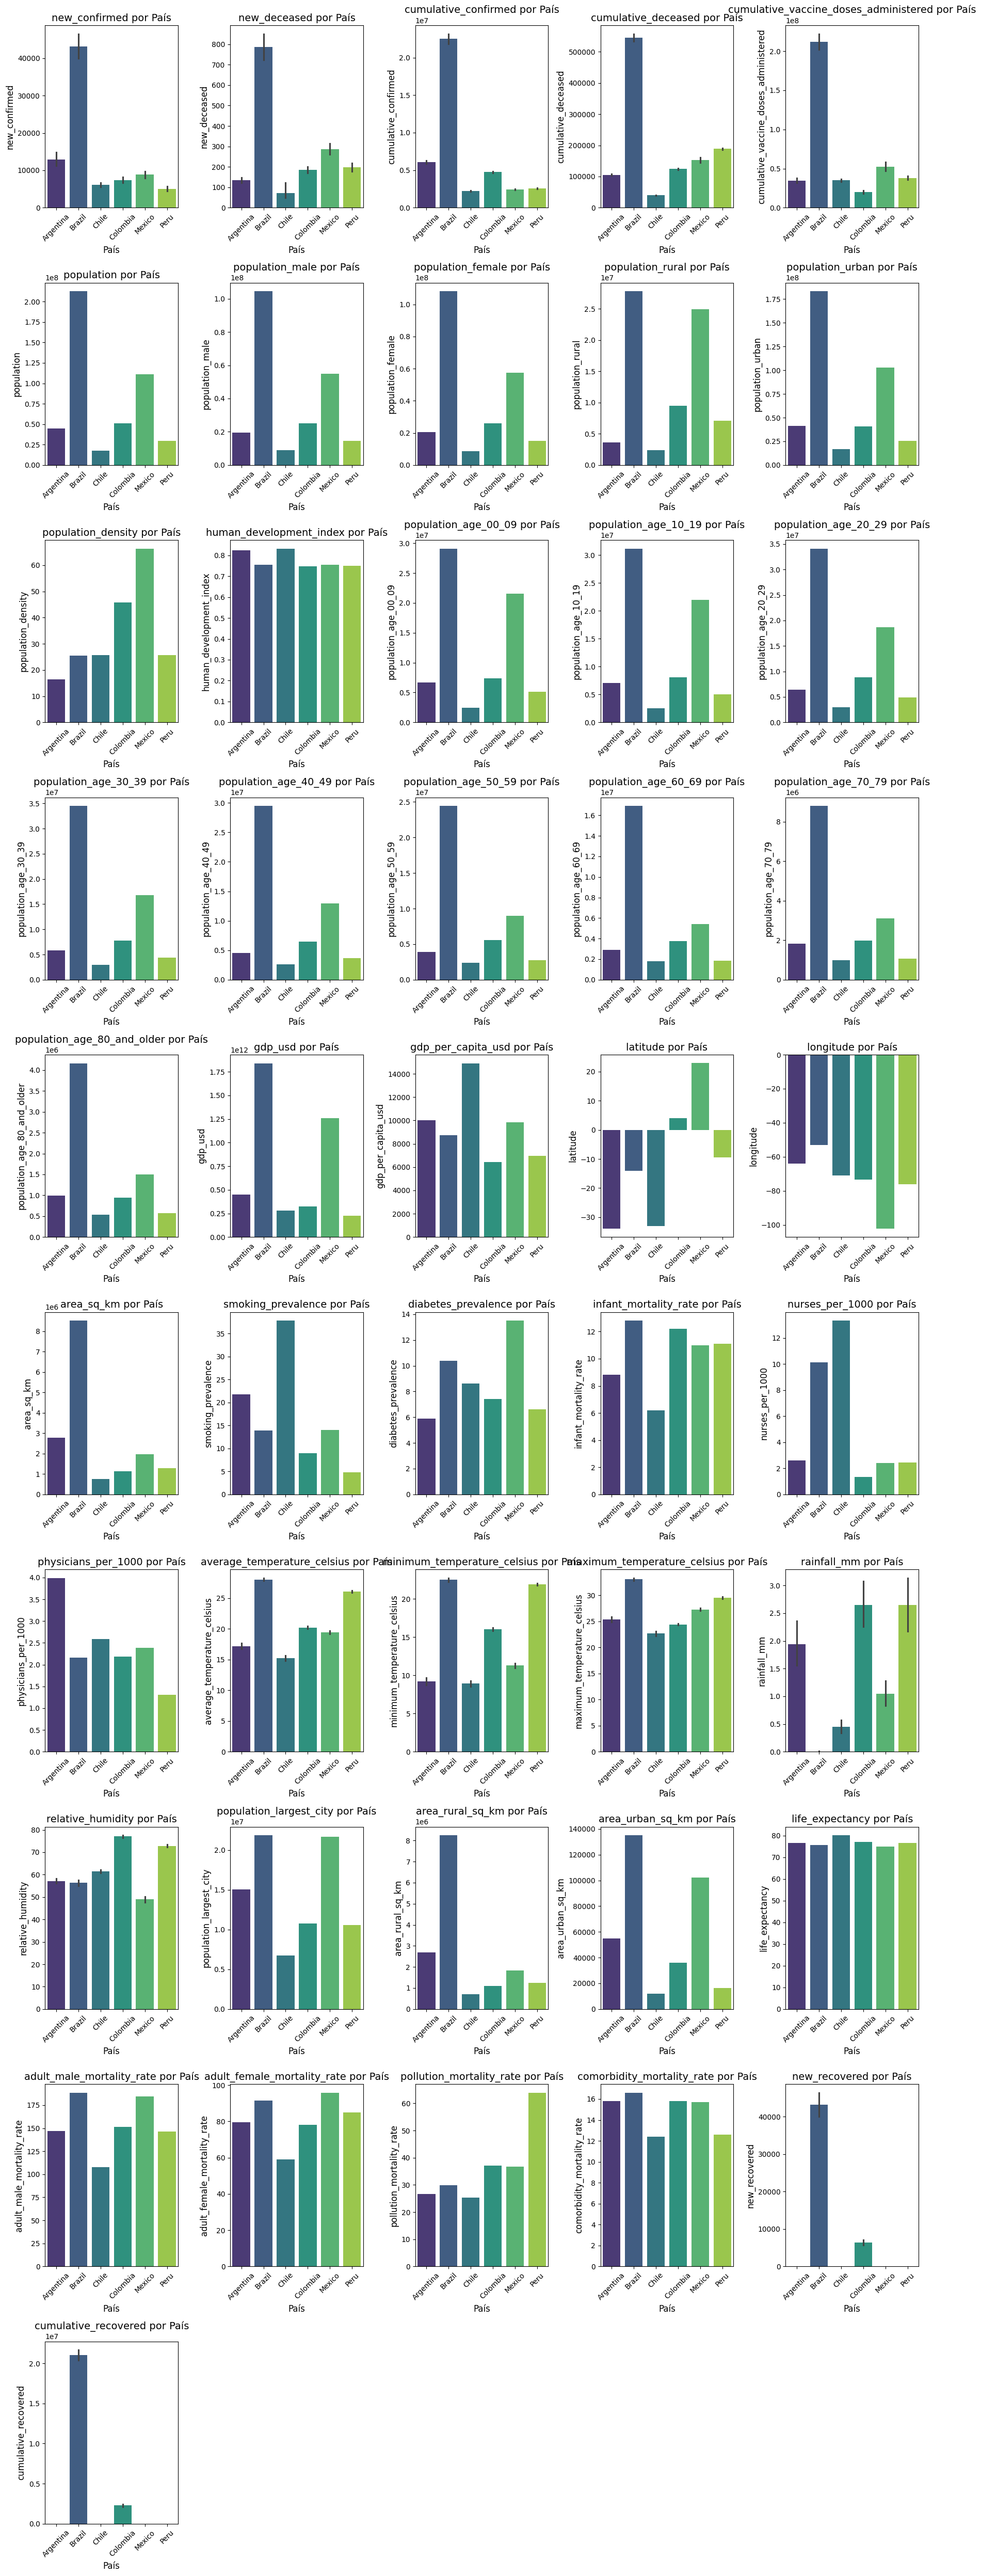

In [36]:
# Gráficos de barras de países contra el resto de variables

# Calcular dinámicamente las filas y columnas necesarias
n_graficos = len(variables_numericas)
n_columnas = 5  
n_filas = math.ceil(n_graficos / n_columnas)  # Número de filas necesarias

# Crear la figura con subplots
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(18, 5 * n_filas))  # Ajustar el tamaño dinámicamente
axes = axes.flatten()  # Aplanar la matriz de subplots para iterar más fácilmente

# Generar un gráfico de barras para cada variable
for i, var in enumerate(variables_numericas):
    sns.barplot(
        data=df_datos_finales,
        x='country_name', 
        y=var,
        hue='country_name',
        palette='viridis',
        ax=axes[i]  # Asignar cada gráfico al subplot correspondiente
    )
    axes[i].set_title(f'{var} por País', fontsize=14)  # Título dinámico
    axes[i].set_xlabel('País', fontsize=12)
    axes[i].set_ylabel(var, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje X

# Ocultar cualquier subplot extra (si es que hay más subplots que gráficos)
for j in range(n_graficos, len(axes)):
    fig.delaxes(axes[j])

# Ajustar los espacios entre los gráficos
plt.tight_layout()
plt.show()

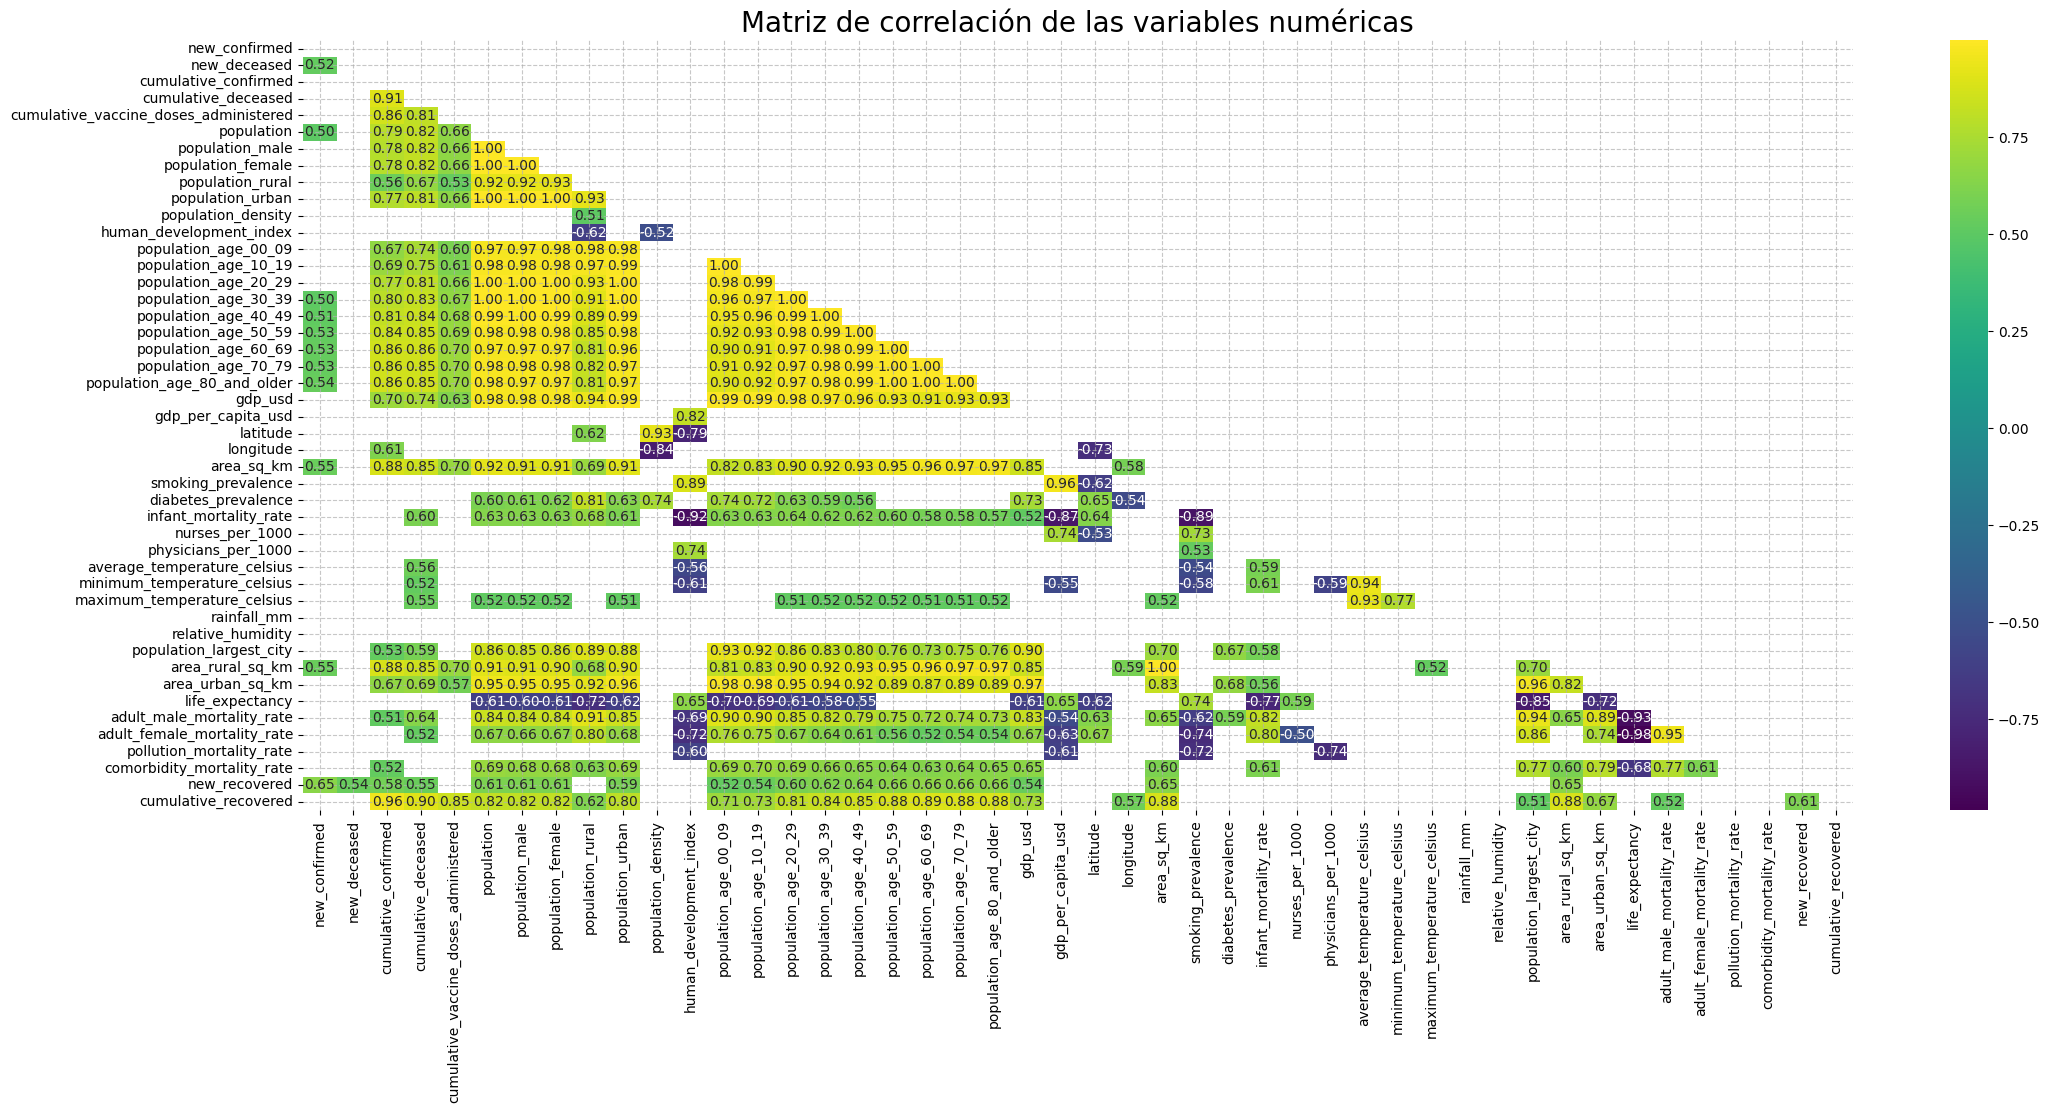

In [ ]:
# Matriz de correlación, se crea una submascara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5.

# Se crea la matriz de correlación de las variables numéricas
numeric_columns = df_datos_finales.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_datos_finales[numeric_columns].corr()

# Se crea máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Se muestran los valores superiores a 0.5 sin embargo también se pueden mostrar valores negativos
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='viridis', fmt='.2f')
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

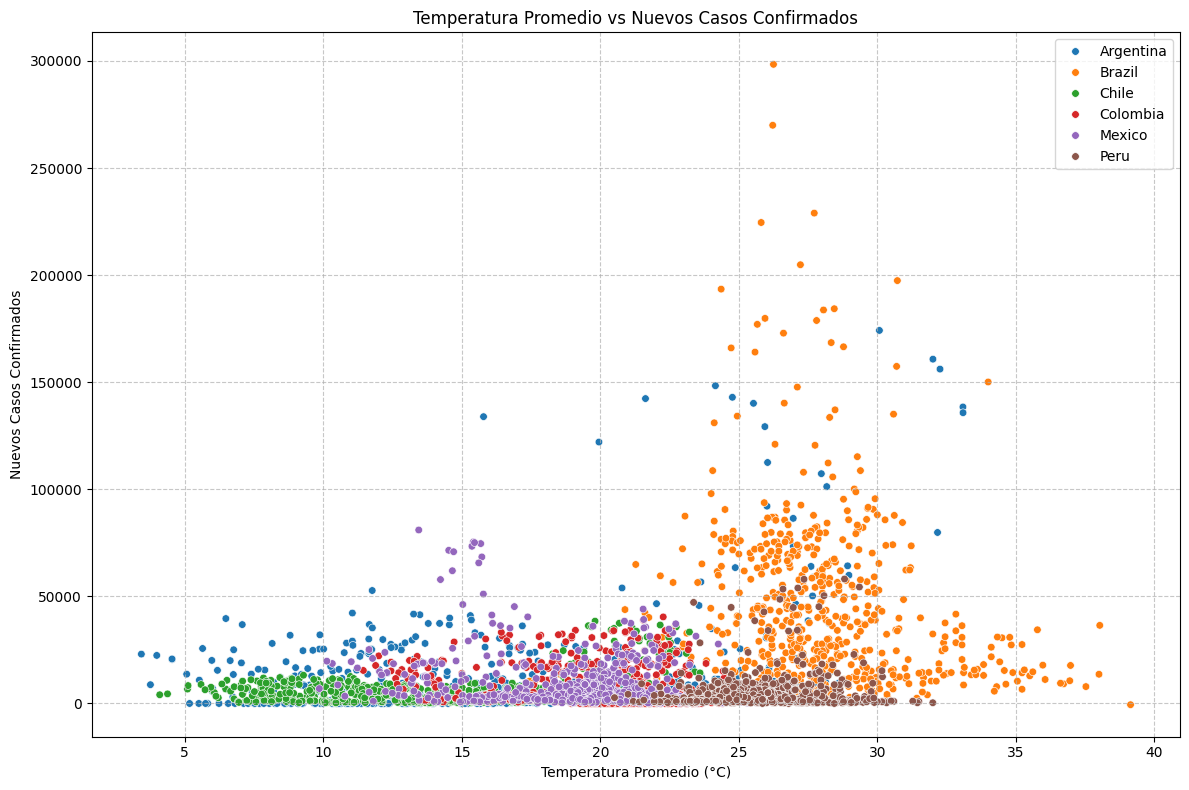

In [38]:
# Diagrama de dispersión de la temperatura media contra los nuevos casos confirmados.

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_datos_finales,
    x='average_temperature_celsius',
    y='new_confirmed',
    hue='country_name',  
    s=30   # Tamaño de los puntos
)

# Personalización del gráfico
plt.title('Temperatura Promedio vs Nuevos Casos Confirmados')
plt.xlabel('Temperatura Promedio (°C)')
plt.ylabel('Nuevos Casos Confirmados')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

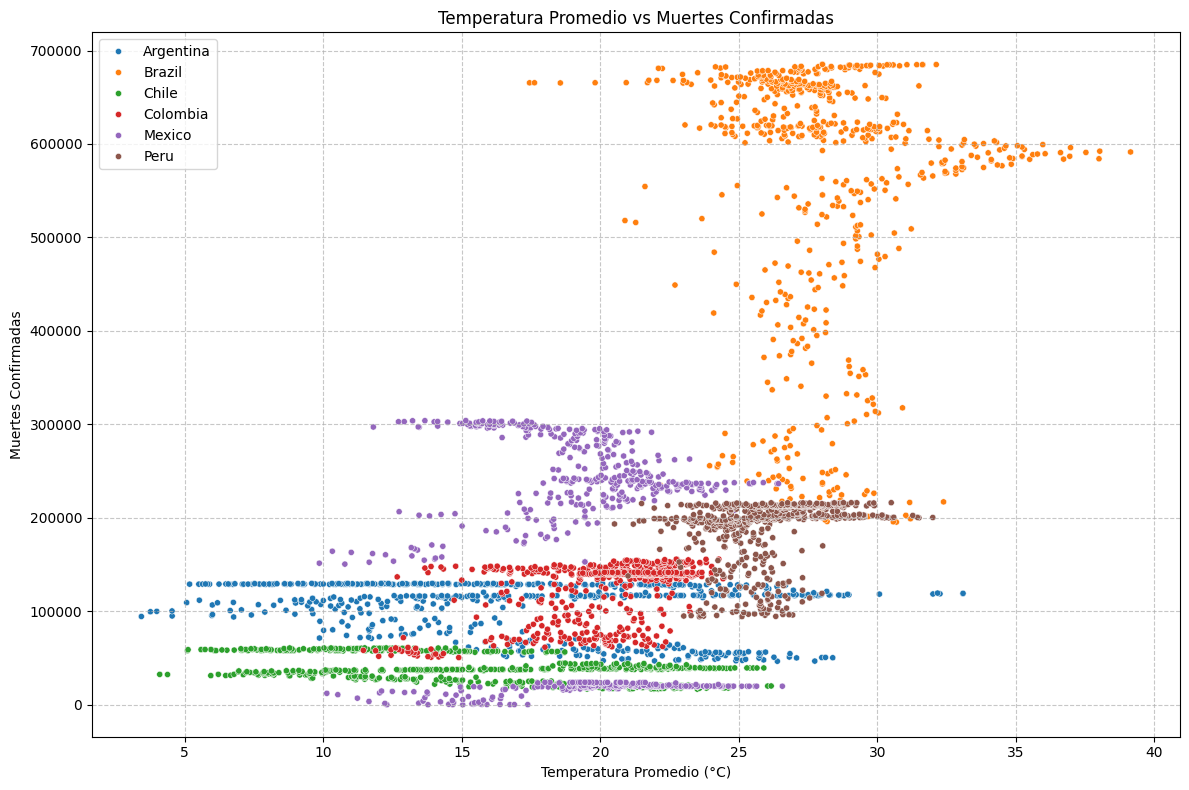

In [39]:
# Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_datos_finales,
    x='average_temperature_celsius',
    y='cumulative_deceased',
    hue='country_name', 
    s=20   # Tamaño de los puntos
)

# Personalización del gráfico
plt.title('Temperatura Promedio vs Muertes Confirmadas')
plt.xlabel('Temperatura Promedio (°C)')
plt.ylabel('Muertes Confirmadas')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

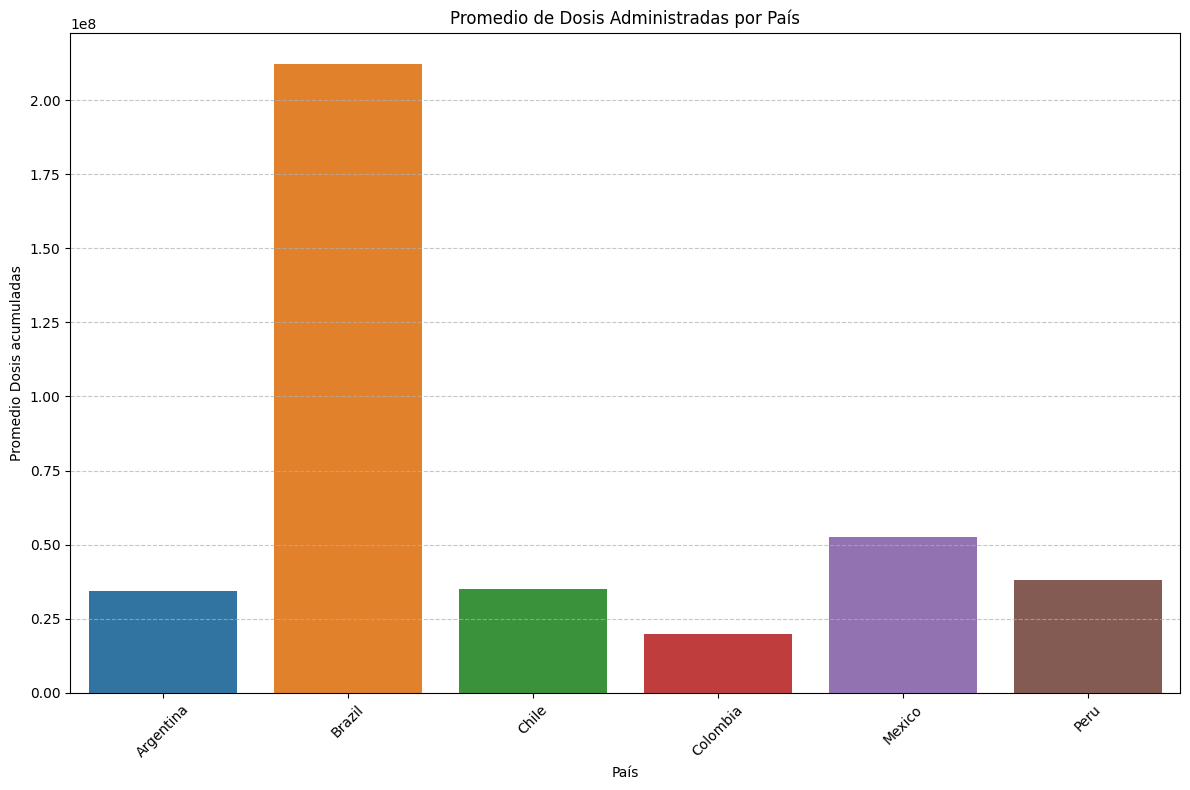

In [40]:
# Comportamiento de las dosis administradas de todos los países (Valor medio)

# Calcular el promedio de las dosis administradas por país
promedio_dosis = df_datos_finales.groupby('country_name')['cumulative_vaccine_doses_administered'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(
    data=promedio_dosis,
    x='country_name',
    y='cumulative_vaccine_doses_administered',
    hue='country_name'
)

# Personalización del gráfico
plt.title('Promedio de Dosis Administradas por País')
plt.xlabel('País')
plt.ylabel('Promedio Dosis acumuladas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

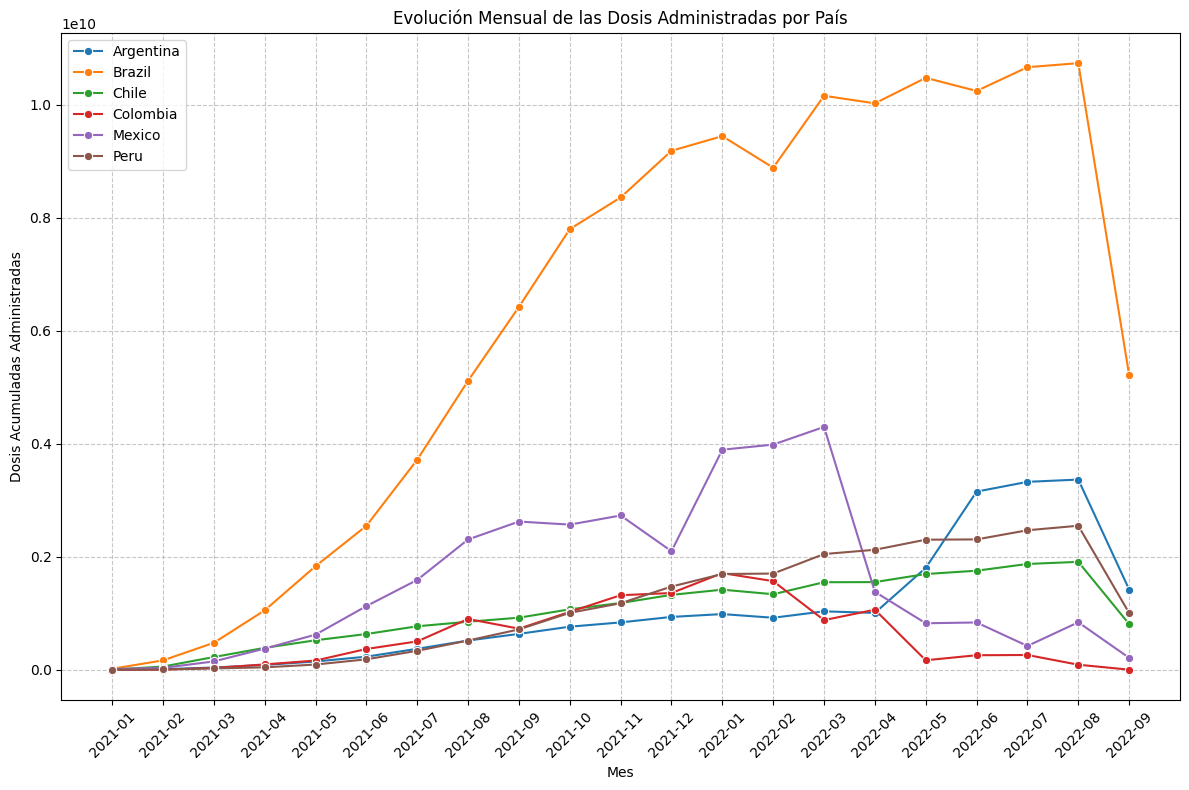

In [41]:
# Evolución de dosis administradas por mes de cada país

# Se crea una columna para el mes y año
df_datos_finales['month'] = df_datos_finales['date'].dt.to_period('M')  # Extrae año y mes como un período

# Agrupar por país y mes, calculando la suma de las dosis administradas
df_monthly = df_datos_finales.groupby(['country_name', 'month'])['cumulative_vaccine_doses_administered'].sum().reset_index()

# Convertir la columna 'month' a string para que seaborn pueda manejarlo correctamente
df_monthly['month'] = df_monthly['month'].astype('str')

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df_monthly,
    x='month',
    y='cumulative_vaccine_doses_administered',
    hue='country_name',
    marker='o'
)

# Personalización del gráfico
plt.title('Evolución Mensual de las Dosis Administradas por País')
plt.xlabel('Mes')
plt.ylabel('Dosis Acumuladas Administradas')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

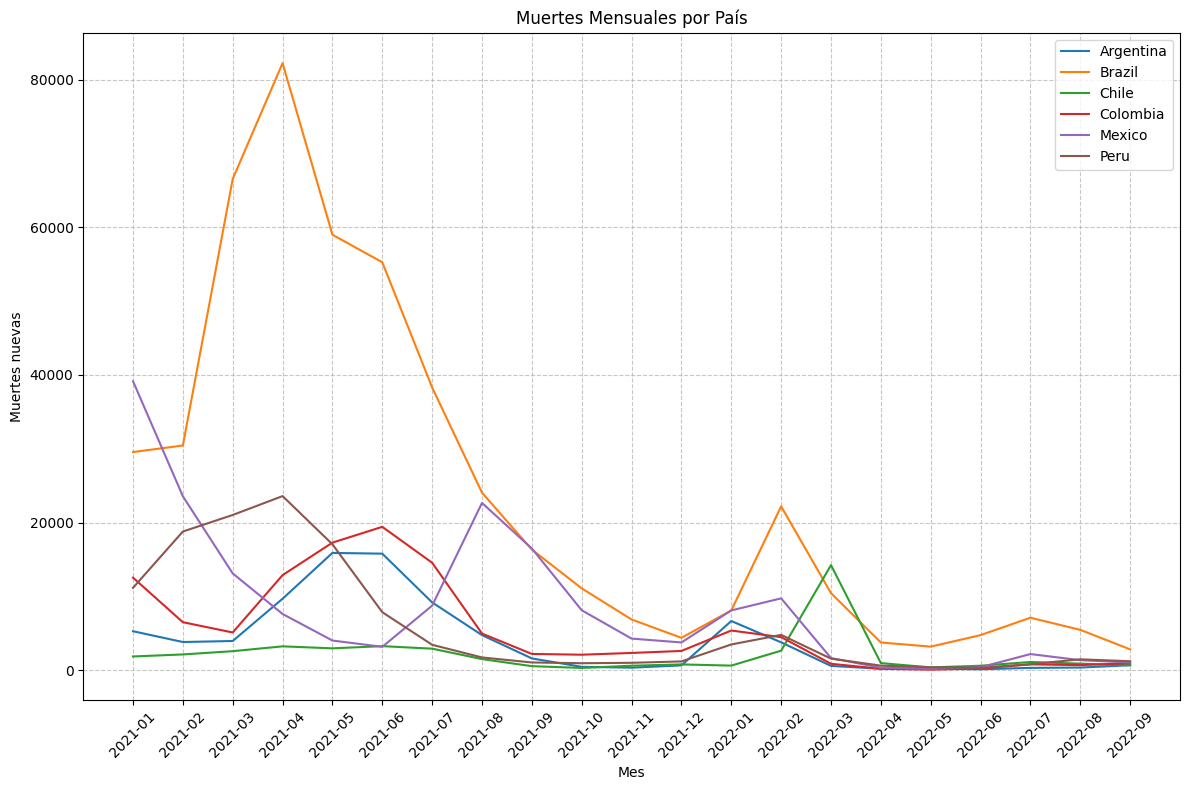

In [42]:
# Muertes por mes de cada país

# Agrupar por país y mes, calculando la suma de las muertes
df_monthly_deceased = df_datos_finales.groupby(['country_name', 'month'])['new_deceased'].sum().reset_index()

# Convertir la columna 'month' a string para que seaborn pueda manejarlo correctamente
df_monthly_deceased['month'] = df_monthly_deceased['month'].astype(str)

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df_monthly_deceased,
    x='month',
    y='new_deceased',
    hue='country_name',
)

# Personalización del gráfico
plt.title('Muertes Mensuales por País')
plt.xlabel('Mes')
plt.ylabel('Muertes nuevas')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

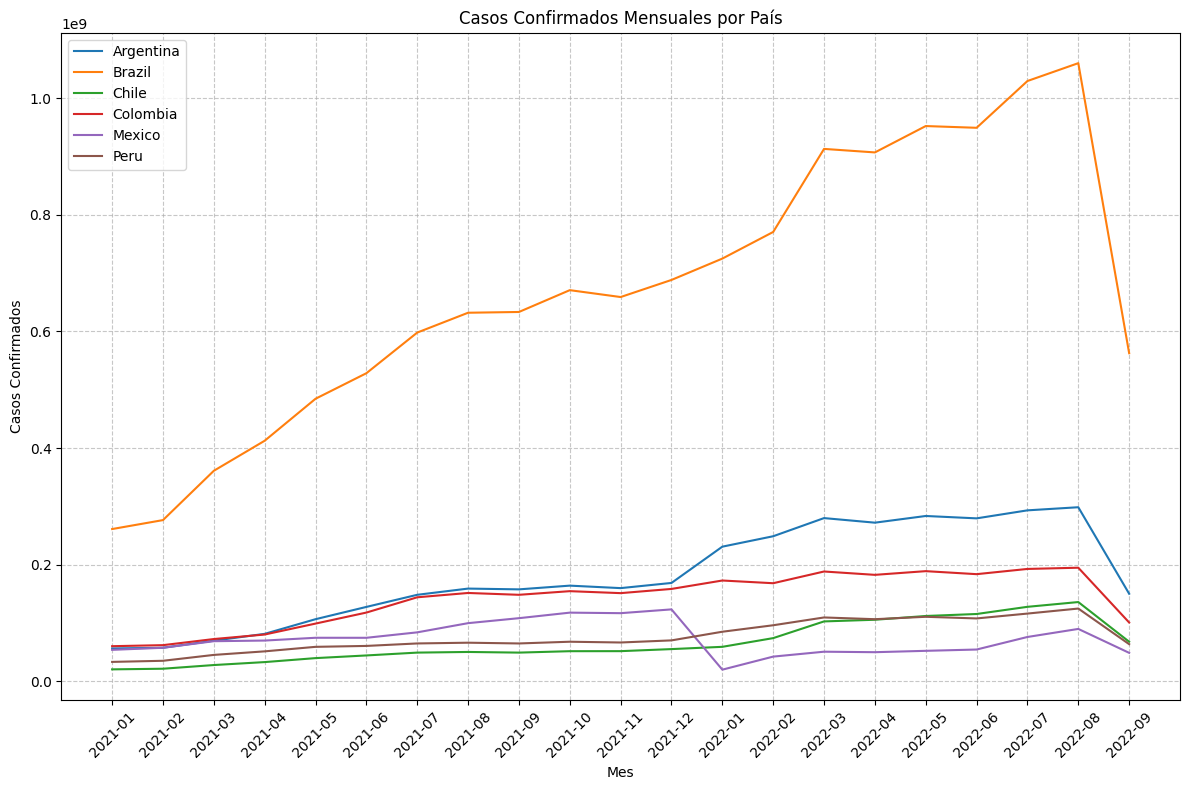

In [43]:
# Casos confirmados por mes de cada país

# Agrupar por país y mes, calculando la suma de casos confirmados
df_monthly_confirmed = df_datos_finales.groupby(['country_name', 'month'])['cumulative_confirmed'].sum().reset_index()

# Convertir la columna 'month' a string para que seaborn pueda manejarlo correctamente
df_monthly_confirmed['month'] = df_monthly_confirmed['month'].astype(str)

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df_monthly_confirmed,
    x='month',
    y='cumulative_confirmed',
    hue='country_name',
)

# Personalización del gráfico
plt.title('Casos Confirmados Mensuales por País')
plt.xlabel('Mes')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

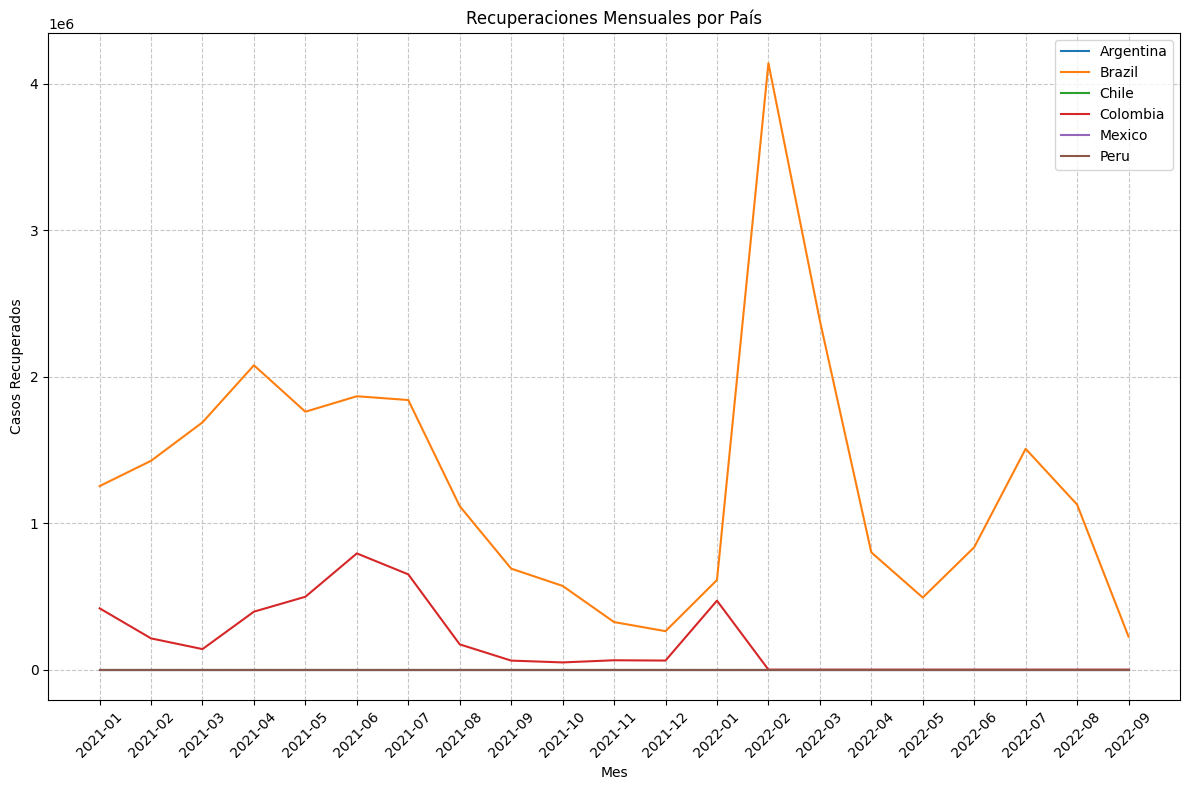

In [44]:
# Recuperaciones de casos por mes de cada país

# Agrupar por país y mes, calculando la suma de recuperaciones
df_monthly_recovered = df_datos_finales.groupby(['country_name', 'month'])['new_recovered'].sum().reset_index()

# Convertir la columna 'month' a string para que seaborn pueda manejarlo correctamente
df_monthly_recovered['month'] = df_monthly_recovered['month'].astype(str)

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df_monthly_recovered,
    x='month',
    y='new_recovered',
    hue='country_name',
)

# Personalización del gráfico
plt.title('Recuperaciones Mensuales por País')
plt.xlabel('Mes')
plt.ylabel('Casos Recuperados')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

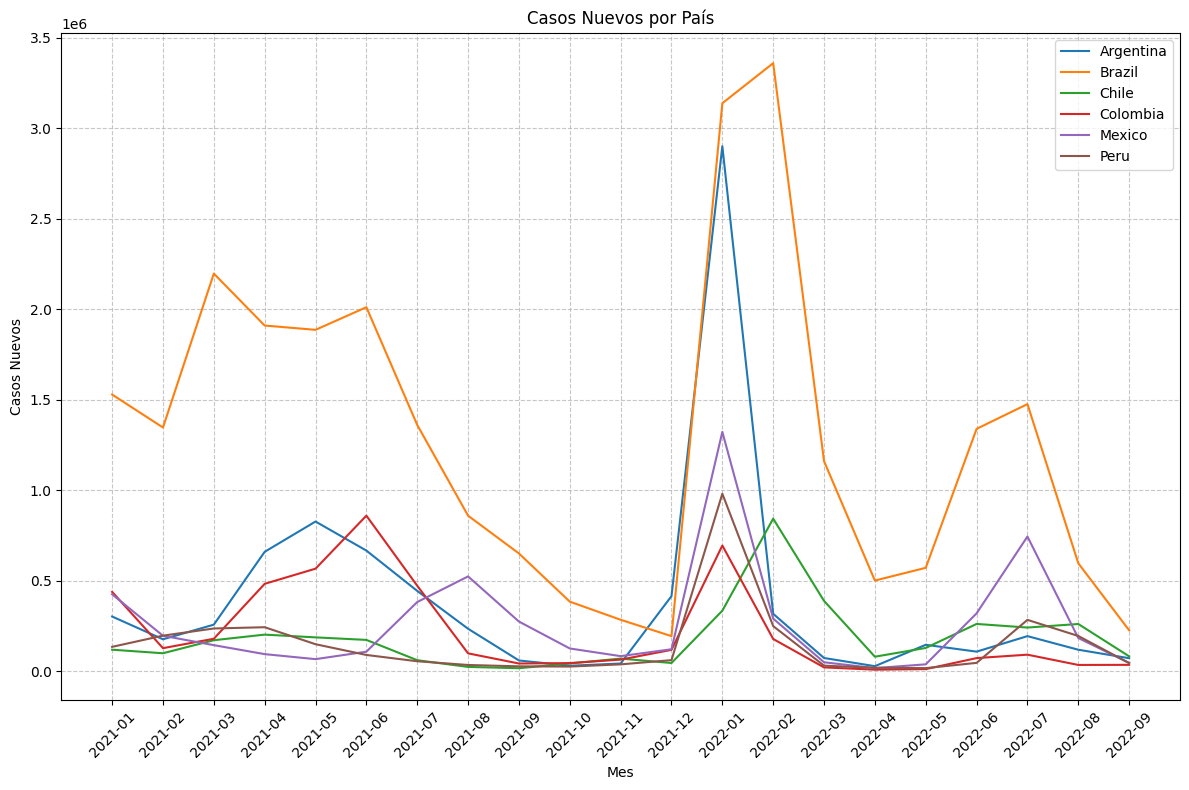

In [45]:
# Comparación del número de casos nuevos entre países

# Agrupar por país y mes, calculando la suma de nuevos casos confirmados
df_monthly_new_confirmed = df_datos_finales.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()

# Convertir la columna 'month' a string para que seaborn pueda manejarlo correctamente
df_monthly_new_confirmed['month'] = df_monthly_new_confirmed['month'].astype(str)

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df_monthly_new_confirmed,
    x='month',
    y='new_confirmed',
    hue='country_name',
)

# Personalización del gráfico
plt.title('Casos Nuevos por País')
plt.xlabel('Mes')
plt.ylabel('Casos Nuevos')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

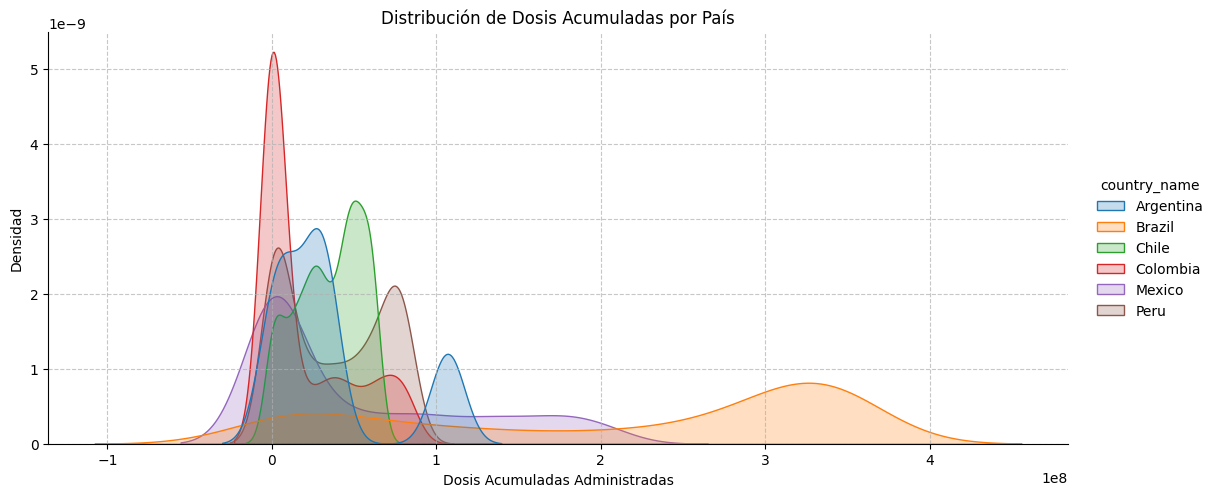

In [46]:
# Dosis acumuladas por país

# Crear el gráfico de distribución
plt.figure(figsize=(12, 8))
sns.displot(
    data=df_datos_finales,
    x='cumulative_vaccine_doses_administered',
    hue='country_name',
    kind='kde',  # Puede ser 'kde' para densidad o 'hist' para histograma
    fill=True,  # Rellenar bajo las curvas si usas 'kde'
    palette='tab10',  # Paleta de colores
    aspect=2.2  # Relación de aspecto
)

# Personalización del gráfico
plt.title('Distribución de Dosis Acumuladas por País')
plt.xlabel('Dosis Acumuladas Administradas')
plt.ylabel('Densidad')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

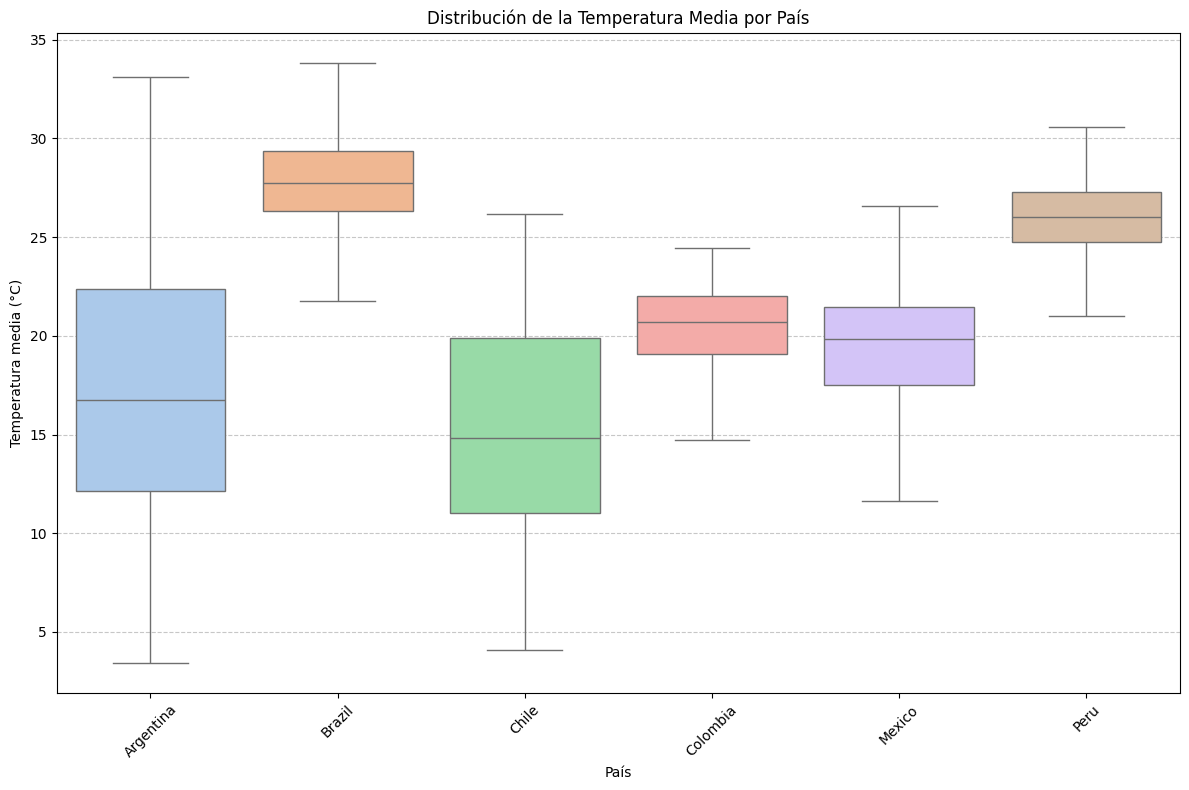

In [47]:
# Boxplot de temperatura media de cada país

# Crear el gráfico de caja
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df_datos_finales,
    x='country_name',
    y='average_temperature_celsius',
    showfliers=False,   # Para no mostrar los valores fuera de rango o outlayers
    hue='country_name',
    palette='pastel'
)

# Personalización del gráfico
plt.title('Distribución de la Temperatura Media por País')
plt.xlabel('País')
plt.ylabel('Temperatura media (°C)')
plt.xticks(rotation=45)  
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

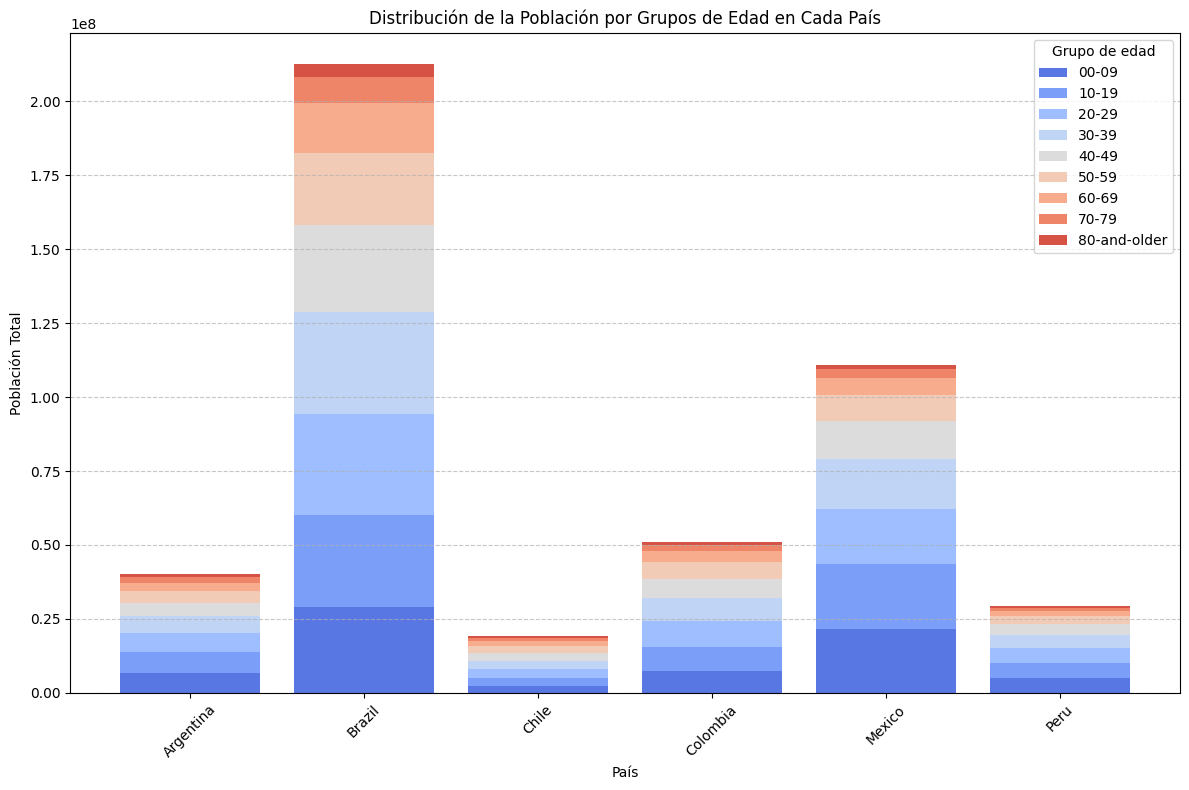

In [48]:
# Distribución de la población por grupos de edad

# Seleccionar las columnas de los grupos de edad
age_columns = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

# Crear un DataFrame con los datos necesarios
age_data = df_datos_finales[['country_name'] + age_columns].copy()

# Escoger una nueva paleta de colores
colors = sns.color_palette("coolwarm", len(age_columns))  

# Configuración del gráfico
plt.figure(figsize=(12, 8))

# Apilamos cada grupo de edad
bottom = None  # Esto se usará para apilar las barras
for idx, age_group in enumerate (age_columns):
    plt.bar(
        age_data['country_name'],
        age_data[age_group],
        label=age_group.replace('population_age_', '').replace('_', '-'),
        bottom=bottom,
        color=colors[idx]
    )
    # Actualizar el valor inferior para la siguiente barra apilada
    bottom = age_data[age_group] if bottom is None else bottom + age_data[age_group]

# Personalización del gráfico
plt.title('Distribución de la Población por Grupos de Edad en Cada País')
plt.xlabel('País')
plt.ylabel('Población Total')
plt.legend(title='Grupo de edad', loc='best')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

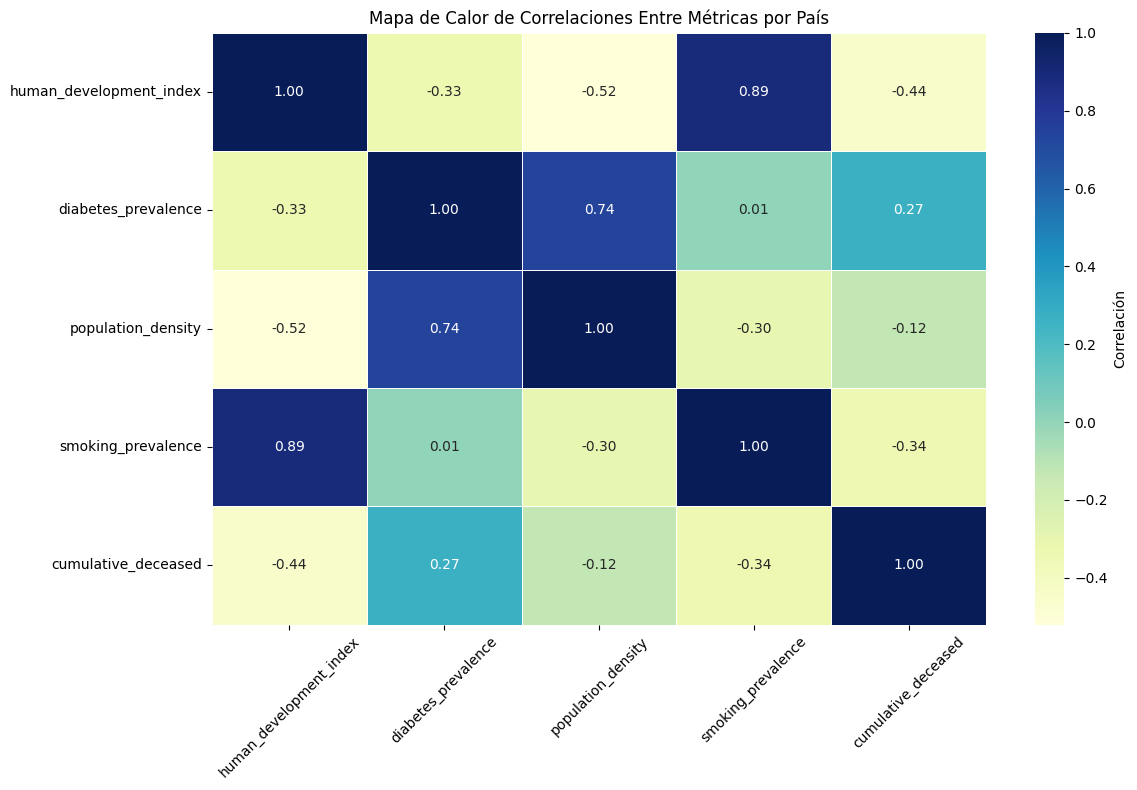

In [49]:
# Mapa de calor de métricas por país

# Seleccionar las métricas relevantes
metrics = [
    'human_development_index', 'diabetes_prevalence', 
    'population_density', 'smoking_prevalence', 'cumulative_deceased',
]

# Crear un DataFrame con las métricas
correlation_data = df_datos_finales[metrics]

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Configuración del gráfico
plt.figure(figsize=(12, 8))

# Crear el mapa de calor
sns.heatmap(
    correlation_matrix, 
    annot=True,   # Los valores numéricos se anotan dentro de las celdas
    fmt=".2f", 
    cmap="YlGnBu", # Paleta de colores
    linewidths=0.5, 
    cbar_kws={'label': 'Correlación'}
)

# Personalización del gráfico
plt.title('Mapa de Calor de Correlaciones Entre Métricas por País')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_1668\167096180.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_data['male_percentage'] = (
C:\Users\admin\AppData\Local\Temp\ipykernel_1668\167096180.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_data['female_percentage'] = (
C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_

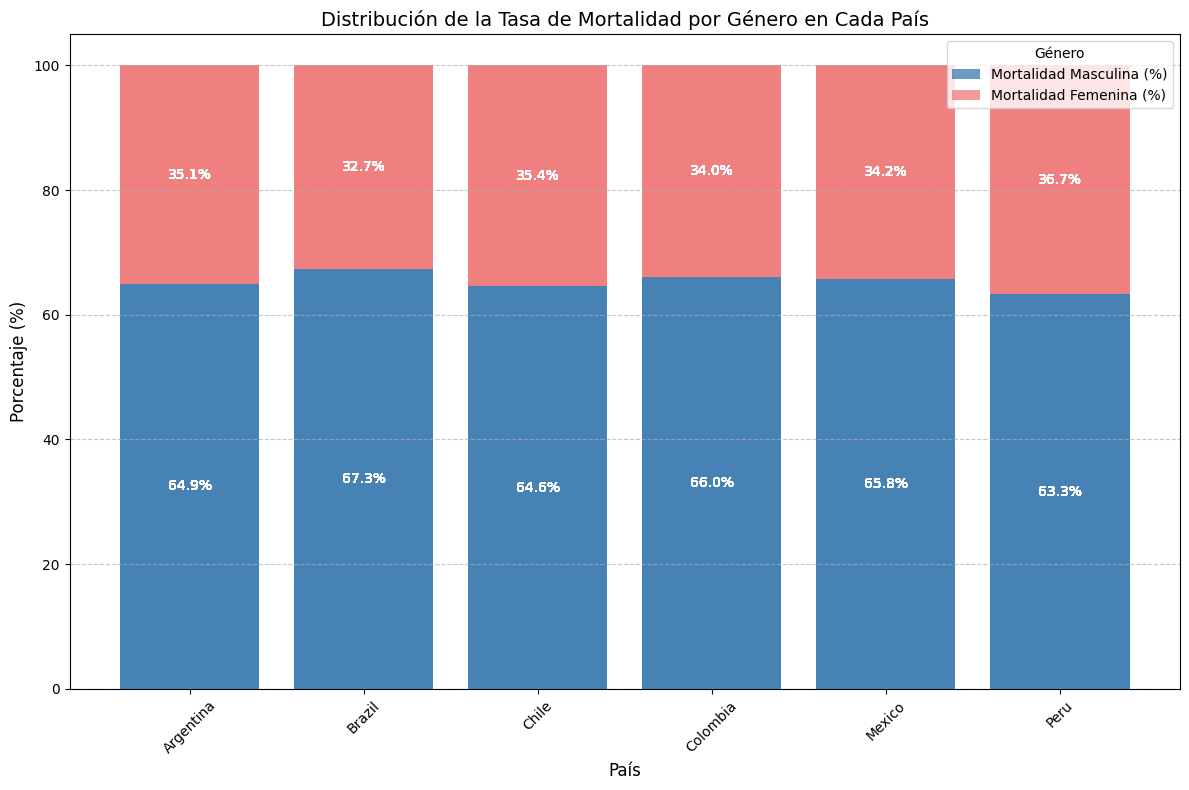

In [50]:
# Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país

# Datos necesarios
mortality_data = df_datos_finales[['country_name', 'adult_male_mortality_rate', 'adult_female_mortality_rate']]

# Normalizar las tasas de mortalidad para que la suma sea 100%
mortality_data['male_percentage'] = (
    mortality_data['adult_male_mortality_rate'] / 
    (mortality_data['adult_male_mortality_rate'] + mortality_data['adult_female_mortality_rate']) * 100
)
mortality_data['female_percentage'] = (
    mortality_data['adult_female_mortality_rate'] / 
    (mortality_data['adult_male_mortality_rate'] + mortality_data['adult_female_mortality_rate']) * 100
)

# Configurar los valores para el gráfico
countries = mortality_data['country_name']
male_percentage = mortality_data['male_percentage']
female_percentage = mortality_data['female_percentage']

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear las barras apiladas para las tasas normalizadas
bar_width = 0.6
bars1 = plt.bar(countries, male_percentage, label='Mortalidad Masculina (%)', color='steelblue', alpha=0.8)
bars2 = plt.bar(countries, female_percentage, bottom=male_percentage, label='Mortalidad Femenina (%)', color='lightcoral', alpha=0.8)

# Agregar etiquetas sobre las barras masculinas
for bar in bars1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posición x
        height / 2,  # Posición y (centrado en la barra masculina)
        f'{height:.1f}%',  # Texto con formato
        ha='center', va='center', fontsize=10, color='white'
    )

# Agregar etiquetas sobre las barras femeninas
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    plt.text(
        bar2.get_x() + bar2.get_width() / 2,  # Posición x
        height1 + height2 / 2,  # Posición y (centrado en la barra femenina)
        f'{height2:.1f}%',  # Texto con formato
        ha='center', va='center', fontsize=10, color='white'
    )

# Personalización del gráfico
plt.title('Distribución de la Tasa de Mortalidad por Género en Cada País', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

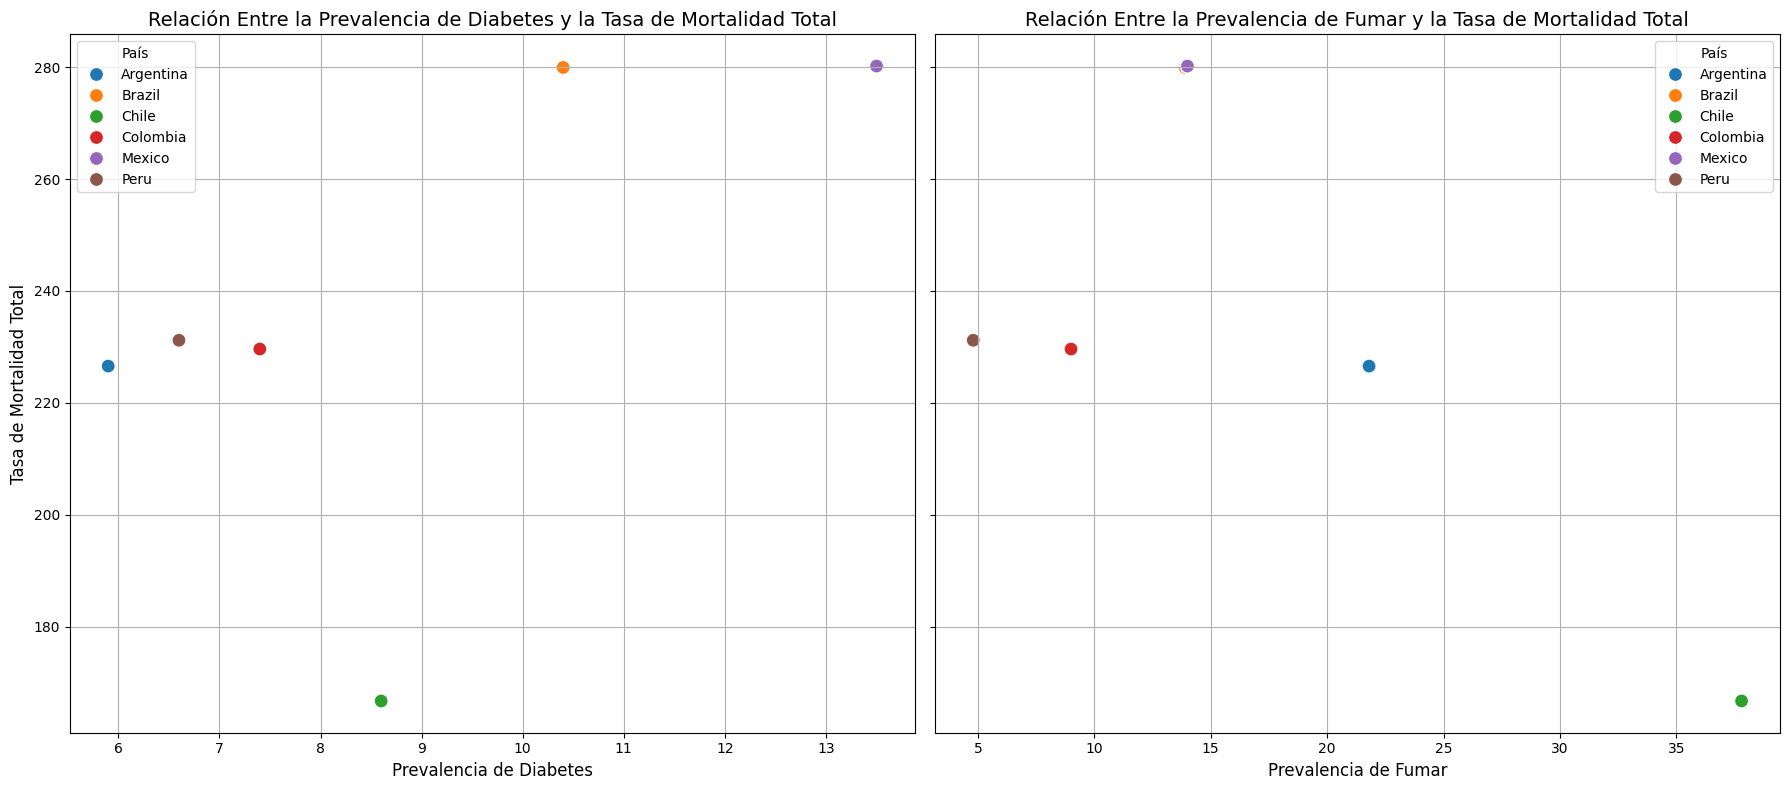

In [51]:
# Comparación de la Prevalencia de Diabetes y de Fumar y la Tasa de Mortalidad

# Crear una nueva columna con la tasa de mortalidad total (suma de las tasas masculina y femenina)
df_datos_finales['total_mortality_rate'] = df_datos_finales['adult_male_mortality_rate'] + df_datos_finales['adult_female_mortality_rate']

# Crear la figura con dos subgráficos (gráfico 1: diabetes vs mortalidad, gráfico 2: fumar vs mortalidad)
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Primer gráfico (Relación entre prevalencia de diabetes y tasa de mortalidad total)
sns.scatterplot(data=df_datos_finales, x='diabetes_prevalence', y='total_mortality_rate', hue='country_name', palette='tab10', s=100, ax=axes[0])
axes[0].set_title('Relación Entre la Prevalencia de Diabetes y la Tasa de Mortalidad Total', fontsize=14)
axes[0].set_xlabel('Prevalencia de Diabetes', fontsize=12)
axes[0].set_ylabel('Tasa de Mortalidad Total', fontsize=12)
axes[0].legend(title='País')
axes[0].grid(True)

# Segundo gráfico (Relación entre prevalencia de fumar y tasa de mortalidad total)
sns.scatterplot(data=df_datos_finales, x='smoking_prevalence', y='total_mortality_rate', hue='country_name', palette='tab10', s=100, ax=axes[1])
axes[1].set_title('Relación Entre la Prevalencia de Fumar y la Tasa de Mortalidad Total', fontsize=14)
axes[1].set_xlabel('Prevalencia de Fumar', fontsize=12)
axes[1].set_ylabel('Tasa de Mortalidad Total', fontsize=12)
axes[1].legend(title='País')
axes[1].grid(True)
plt.tight_layout()
plt.show()

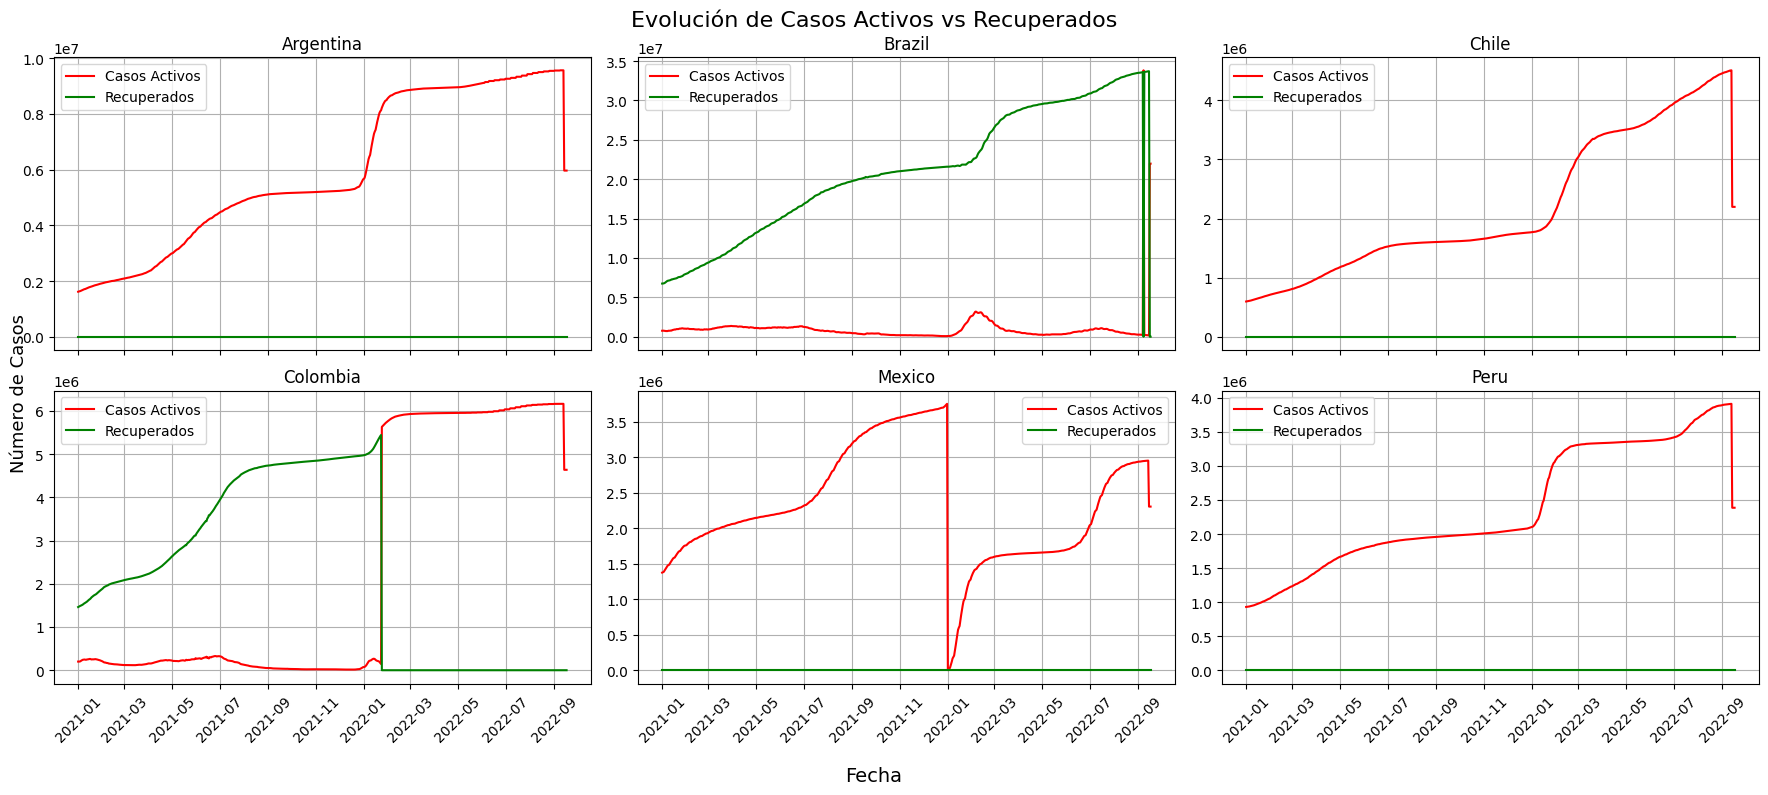

In [53]:
# Evolución de Casos Activos vs. Recuperados

# Se ordenan los datos por país y fecha
df_datos_finales.sort_values(by=['country_name', 'date'], inplace=True)

# Crear una nueva columna para los casos activos
df_datos_finales['active_cases'] = (df_datos_finales['cumulative_confirmed'] - df_datos_finales['cumulative_recovered'] - df_datos_finales['cumulative_deceased'])

# Obtener la lista de países únicos
paises = df_datos_finales['country_name'].unique()

# Determinar el número de filas y columnas para el tablero
num_paises = len(paises)
filas = 2
columnas = 3
tableros = math.ceil(num_paises / (filas * columnas))

# Iterar sobre los tableros si hay más de 6 países
for tablero in range(tableros):
    fig, axes = plt.subplots(filas, columnas, figsize=(18, 8), sharex=True)
    axes = axes.flatten()  # Convertir los ejes en un arreglo plano para iterar fácilmente
    
    # Seleccionar los países a mostrar en este tablero
    start_idx = tablero * (filas * columnas)
    end_idx = start_idx + (filas * columnas)
    paises_tablero = paises[start_idx:end_idx]

    for i, pais in enumerate(paises_tablero):
        ax = axes[i]
        df_pais = df_datos_finales[df_datos_finales['country_name'] == pais]

        # Graficar casos activos y recuperados
        sns.lineplot(data=df_pais, x='date', y='active_cases', label='Casos Activos', ax=ax, color='red')
        sns.lineplot(data=df_pais, x='date', y='cumulative_recovered', label='Recuperados', ax=ax, color='green')

        # Configuración del gráfico
        ax.set_title(f"{pais}", fontsize=12)
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)
        ax.set_ylabel('')
        ax.legend()
        ax.grid(True)

    # Ocultar los gráficos no utilizados en el tablero actual
    for j in range(len(paises_tablero), len(axes)):
        axes[j].axis('off')

    # Agregar etiquetas globales para los ejes
    fig.supxlabel('Fecha', fontsize=14)
    fig.supylabel('Número de Casos', fontsize=13)

    # Ajustar espaciado entre subplots
    plt.tight_layout()
    plt.suptitle("Evolución de Casos Activos vs Recuperados", fontsize=16)
    plt.subplots_adjust(top=0.92)  # Espacio para el título principal
    plt.show()

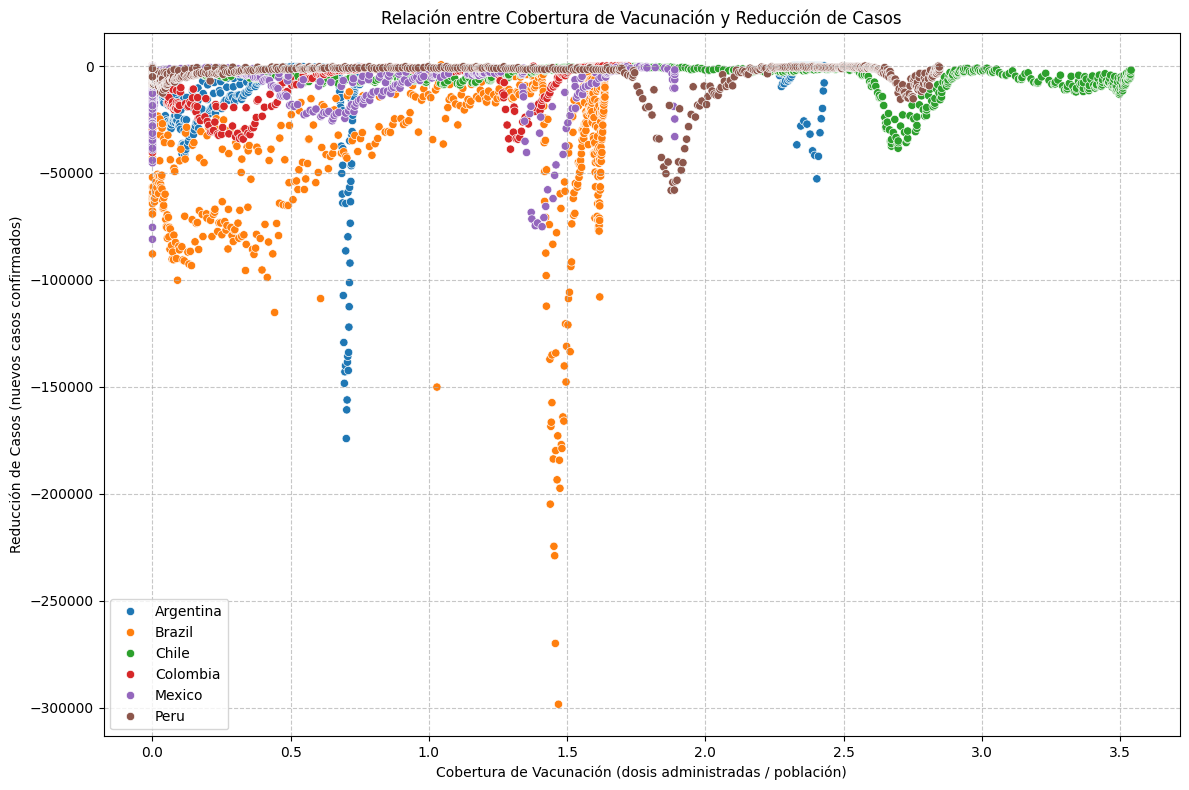

In [54]:
# Relación entre la Cobertura de Vacunación y la Reducción de Casos

# Calcular la cobertura de vacunación
df_datos_finales['cobertura_vacunacion'] = df_datos_finales['cumulative_vaccine_doses_administered'] / df_datos_finales['population']

# Calcular la reducción de casos (usaremos new_confirmed como proxy)
df_datos_finales['reduccion_casos'] = -df_datos_finales['new_confirmed']

# Filtrar datos para evitar valores infinitos o NaN
df_datos_finales = df_datos_finales[np.isfinite(df_datos_finales['cobertura_vacunacion']) & np.isfinite(df_datos_finales['reduccion_casos'])]

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_datos_finales,
    x='cobertura_vacunacion', 
    y='reduccion_casos', 
    hue='country_name')

# Personalización del gráfico
plt.title('Relación entre Cobertura de Vacunación y Reducción de Casos')
plt.xlabel('Cobertura de Vacunación (dosis administradas / población)')
plt.ylabel('Reducción de Casos (nuevos casos confirmados)')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

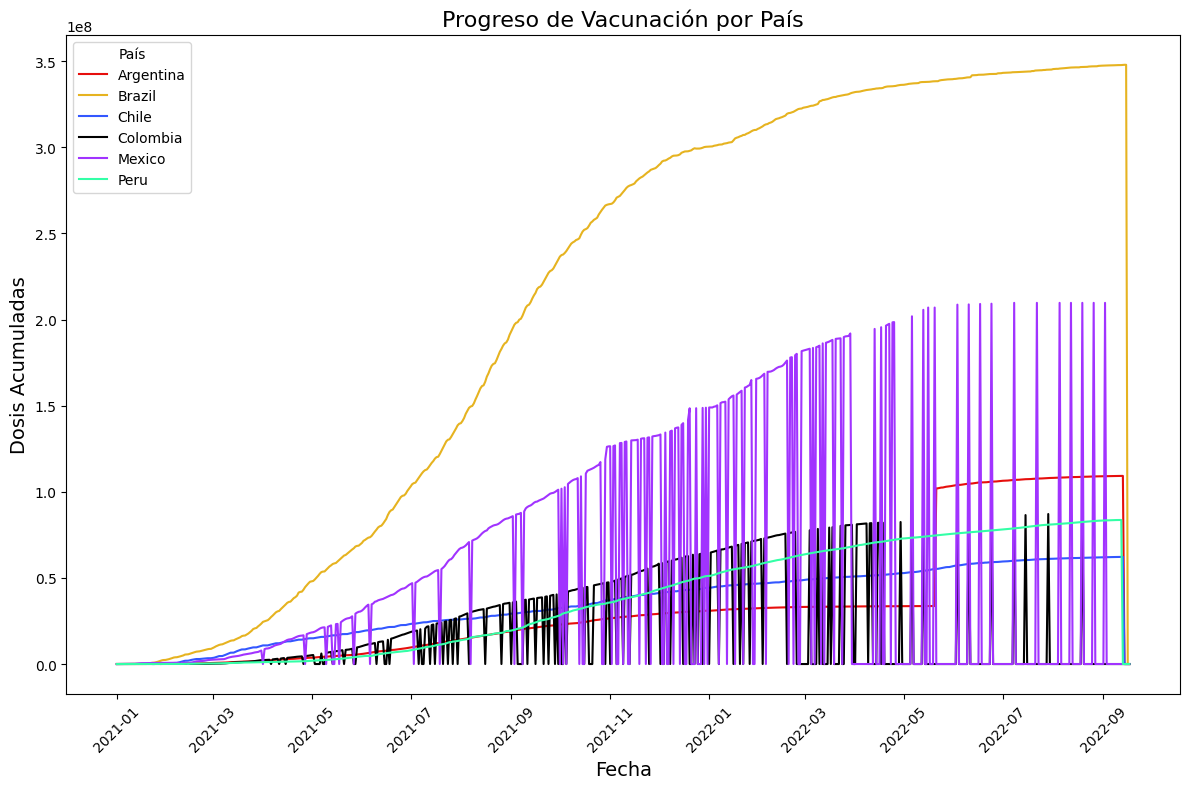

In [55]:
# Progreso de la vacunación por país

# Paleta de colores personalizada
palette = ["#E60E0C", "#E6B320", "#3357FF", "#000000", "#A133FF", "#33FFA7"]

# Crear la figura
plt.figure(figsize=(12, 8))

# Graficar el progreso de la vacunación para cada país
for i, pais in enumerate(paises):
    df_pais = df_datos_finales[df_datos_finales['country_name'] == pais]
    sns.lineplot(data=df_pais, x='date', y='cumulative_vaccine_doses_administered', label=pais, color=palette[i])

# Configuración del gráfico
plt.title("Progreso de Vacunación por País", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Dosis Acumuladas", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='País', loc='best')

# Ajustar espaciado
plt.tight_layout()
plt.show()

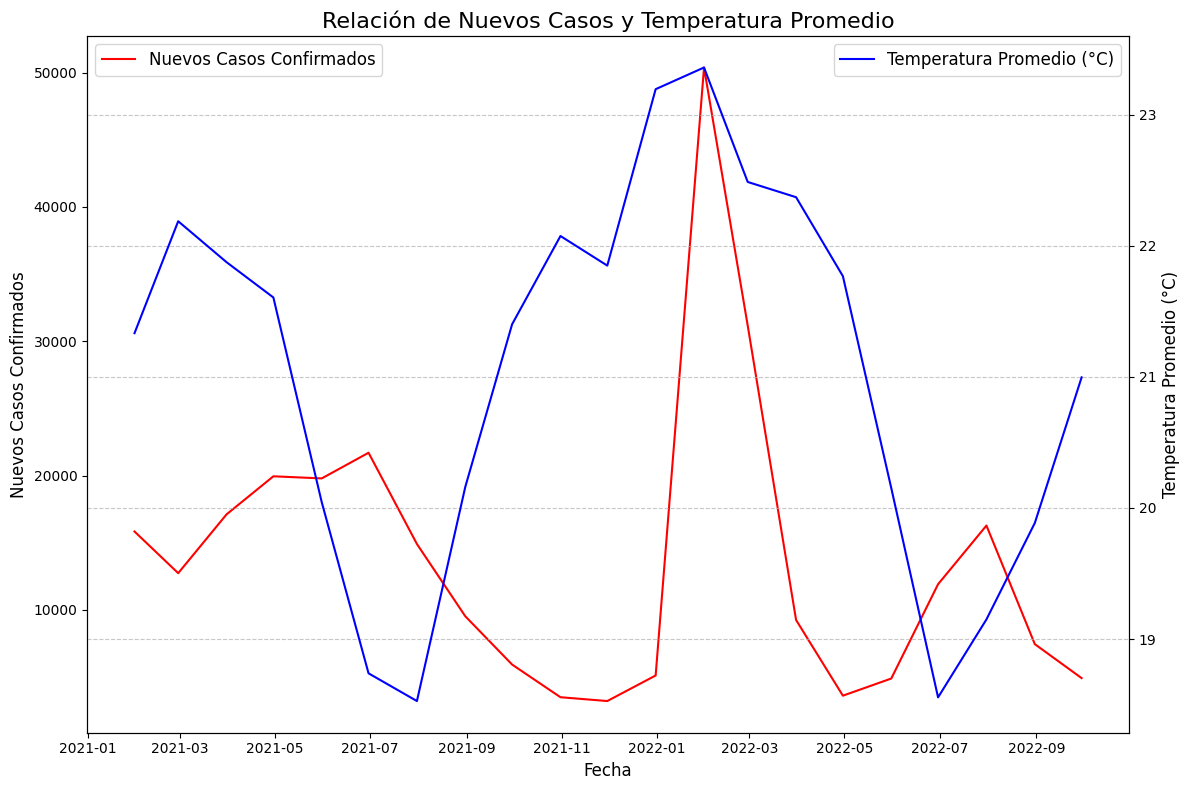

In [56]:
# Nuevos casos y temperatura promedio

# Resample a nivel mensual para obtener la media de cada columna
df_monthly = df_datos_finales.resample('ME', on='date').mean(numeric_only=True)

# Crear figura y ejes
plt.figure(figsize=(12, 8))
ax1 = plt.gca()

# Graficar nuevos casos confirmados en el primer eje Y
ax1.plot(df_monthly.index, df_monthly['new_confirmed'], color='red', label='Nuevos Casos Confirmados')
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Nuevos Casos Confirmados', fontsize=12)
ax1.tick_params(axis='y')

# Crear el segundo eje Y para la temperatura
ax2 = ax1.twinx()
ax2.plot(df_monthly.index, df_monthly['average_temperature_celsius'], color='blue', label='Temperatura Promedio (°C)')
ax2.set_ylabel('Temperatura Promedio (°C)', fontsize=12)
ax2.tick_params(axis='y')

# Título y leyendas
plt.title('Relación de Nuevos Casos y Temperatura Promedio', fontsize=16)
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Mostrar el gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

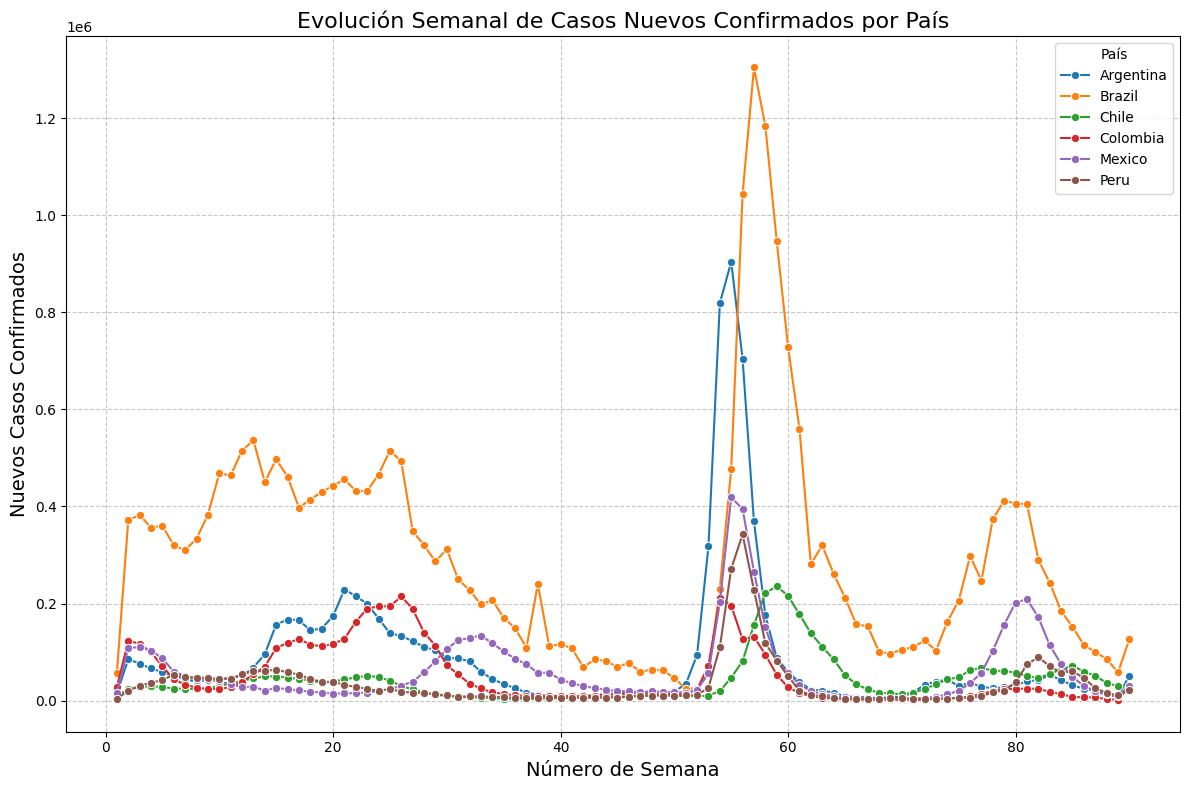

In [57]:
# Evolución Semanal de Casos Nuevos

# Crear la figura
plt.figure(figsize=(12, 8))

# Iterar sobre los países para graficar por separado
for pais in paises:
    df_pais = df_datos_finales[df_datos_finales['country_name'] == pais]

    # Resample por semana y contar los nuevos casos confirmados por semana
    df_pais_semana = df_pais.resample('W', on='date').sum(numeric_only=True)

    # Crear una nueva columna para el número de la semana (a partir del 2021-01-01)
    df_pais_semana['week_number'] = (df_pais_semana.index - pd.Timestamp('2021-01-01')).days // 7 + 1

    # Graficar los nuevos casos confirmados por semana
    sns.lineplot(data=df_pais_semana, x='week_number', y='new_confirmed', label=pais, marker='o')

# Configuración del gráfico
plt.title("Evolución Semanal de Casos Nuevos Confirmados por País", fontsize=16)
plt.xlabel("Número de Semana", fontsize=14)
plt.ylabel("Nuevos Casos Confirmados", fontsize=14)
plt.legend(title='País', loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

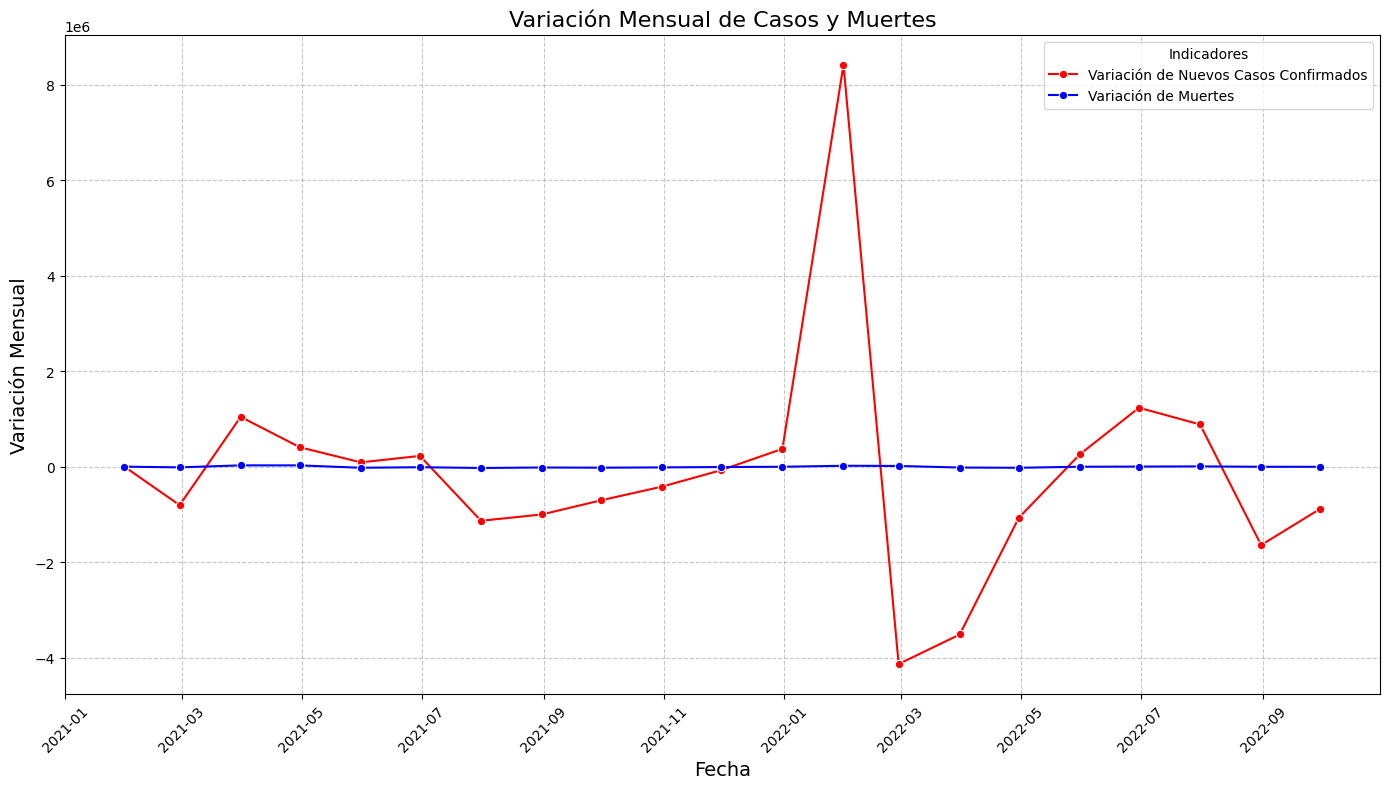

In [58]:
# Variación Mensual de Casos y Muertes

# Resample por mes para obtener la suma de nuevos casos y muertes
df_mes = df_datos_finales.resample('ME', on='date').sum(numeric_only=True)

# Calcular la variación mensual de nuevos casos y muertes
df_mes['new_confirmed_variation'] = df_mes['new_confirmed'].diff().fillna(0)
df_mes['new_deceased_variation'] = df_mes['new_deceased'].diff().fillna(0)

# Crear la figura
plt.figure(figsize=(14, 8))

# Graficar la variación mensual de nuevos casos confirmados
sns.lineplot(data=df_mes, x=df_mes.index, y='new_confirmed_variation', color='red', label='Variación de Nuevos Casos Confirmados', marker='o')

# Graficar la variación mensual de muertes
sns.lineplot(data=df_mes, x=df_mes.index, y='new_deceased_variation', color='blue', label='Variación de Muertes', marker='o')

# Configuración del gráfico
plt.title("Variación Mensual de Casos y Muertes", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Variación Mensual", fontsize=14)
plt.legend(title='Indicadores', loc='best', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

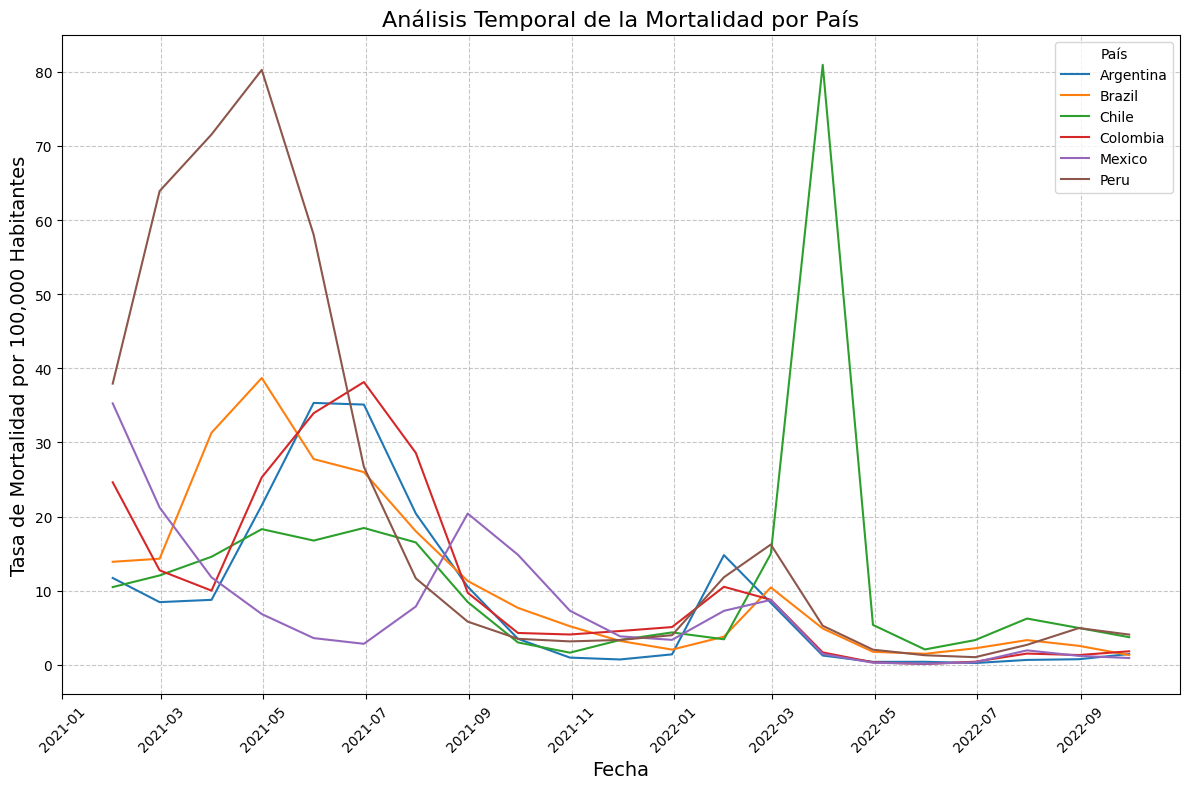

In [59]:
# Análisis Temporal de la Mortalidad

# Crear la figura
plt.figure(figsize=(12, 8))

# Iterar sobre los países para graficar la tasa de mortalidad de cada uno
for pais in paises:
    # Filtrar los datos por país
    df_pais = df_datos_finales[df_datos_finales['country_name'] == pais]

    # Resample por mes para obtener los nuevos casos y nuevas muertes por mes
    df_pais_mes = df_pais.resample('ME', on='date').sum(numeric_only=True)

    # Calcular la tasa de mortalidad mensual por cada 100,000 habitantes
    df_pais_mes['mortality_rate'] = (df_pais_mes['new_deceased'] / df_pais['population'].iloc[0]) * 100000

    # Graficar la tasa de mortalidad mensual por país
    sns.lineplot(data=df_pais_mes, x=df_pais_mes.index, y='mortality_rate', label=pais)

# Configuración del gráfico
plt.title("Análisis Temporal de la Mortalidad por País", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Tasa de Mortalidad por 100,000 Habitantes", fontsize=14)
plt.legend(title='País', loc='best', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## GEOPANDAS

In [62]:
# Procedemos a cargar nuestro dataset nuevamente

# Leer el archivo CSV
df_datos_finales_geo = pd.read_csv('DatosFinalesFiltrado.csv')

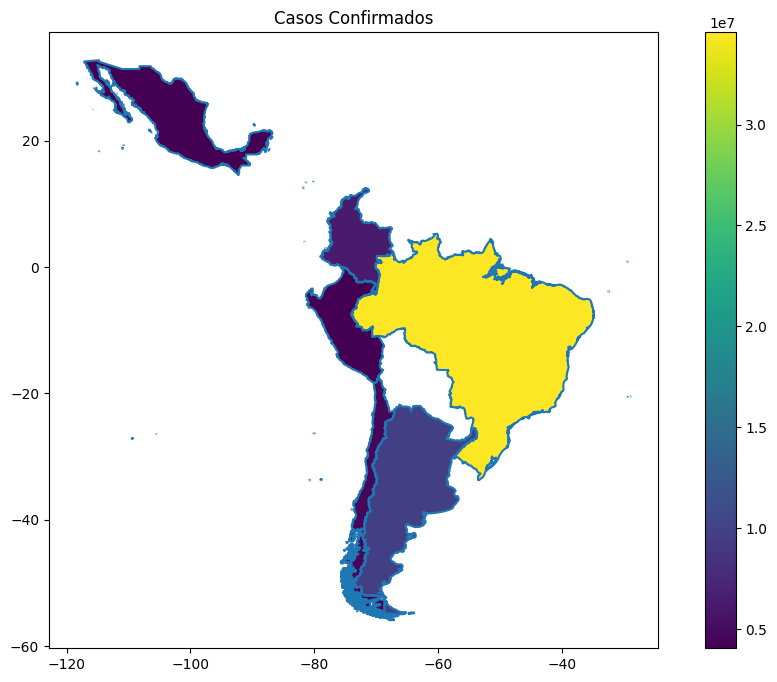

In [ ]:
# Mapa de la distribución de casos confirmados

# Leer el shapefile
world = gpd.read_file(".../PI/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")

# Graficar el mapa
world = world[(world.NAME=="Argentina") | (world.NAME=="Chile") | (world.NAME=="Colombia") | (world.NAME=="Mexico") | (world.NAME=="Peru") | (world.NAME=="Brazil")]
world = world.rename(columns={"NAME":"country_name"})
world = world.merge(df_datos_finales_geo.groupby('country_name')['cumulative_confirmed'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_confirmed', ax=ax, legend=True)
plt.title('Casos Confirmados')
plt.show()

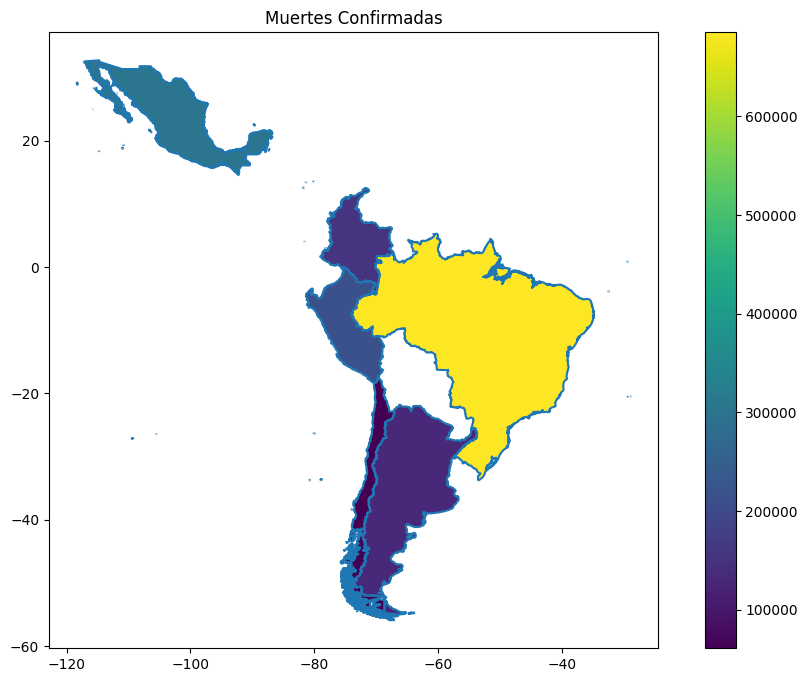

In [ ]:
# Mapa de la distribución de muertes confirmadas

# Leer el shapefile
world = gpd.read_file(".../PI/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")

# Graficar el mapa
world = world[(world.NAME=="Argentina") | (world.NAME=="Chile") | (world.NAME=="Colombia") | (world.NAME=="Mexico") | (world.NAME=="Peru") | (world.NAME=="Brazil")]
world = world.rename(columns={"NAME":"country_name"})
world = world.merge(df_datos_finales_geo.groupby('country_name')['cumulative_deceased'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_deceased', ax=ax, legend=True) 
plt.title('Muertes Confirmadas')
plt.show()